# EDA2

## Configuration and setup

In [1]:
# Import standard modules
import logging

# Import local modules
import common
import analysis
import plotting

# Set variables
DB_FILE = common.obtain_root_path() / "data" / "etraveli.db"
LIMITS = None#(28800, 63000) # Use `None` to disable limits
LOGGING_LEVEL = logging.INFO

# Configure logging
logging.basicConfig(format="[EDA2 %(asctime)s] - %(message)s", level=LOGGING_LEVEL)

### Data

In [2]:
# Load data
errands_df, orders_df = common.load_data(DB_FILE, LIMITS)

# Column transformations
errands_df['is_test_errand'] = errands_df['is_test_errand'].astype(bool)
errands_df['order_id'] = errands_df['order_id'].astype(str)
orders_df['is_changed'] = orders_df['is_changed'].astype(bool)
orders_df['is_canceled'] = orders_df['is_canceled'].astype(bool)

# Filter out test errands
errands_df = errands_df[~errands_df['is_test_errand']]

# Print data shapes
logging.info(f"Errands dataframe shape: {errands_df.shape}")
logging.info(f"Orders dataframe shape: {orders_df.shape}")

[EDA2 2024-12-22 20:30:00,201] - Errands dataframe shape: (2680892, 8)
[EDA2 2024-12-22 20:30:00,441] - Orders dataframe shape: (6300206, 22)


## Independent Feature Analysis

To start the analysis, I implemented a function to calculate key statistics—mean, standard deviation, minimum, and maximum—of the total number of errands per order. This analysis can be performed globally or stratified by any column of interest, with optional filtering to refine the results. While this step still examines variables individually, it provides a foundation for exploring the data and identifying potential outliers.

I employed a Z-score approach, both globally and intra-group, to identify clear outliers and cases warranting further investigation. To ensure statistical reliability, we introduced a threshold based on the 0.25 quantile of the group counts. This threshold limits outlier detection to groups with sufficient data to support confident conclusions.

*Insights from Initial Analysis*

This stratified analysis provides valuable insights into the distribution of errands across orders, including variations by feature. However, it also highlights that individual features alone may not yield strong statistical signals for actionable insights, necessitating the next step: building machine learning models. These models aim to predict (1) whether an order will result in errands, (2) the number of errands, (3) the outcomes of errands.

This step serves as a preliminary foundation for a dynamic system that continuously updates predictions over time, refining them after each errand occurs. Nevertheless, some noteworthy observations and areas for further investigation emerged from this initial analysis:

- Partners:
    - No single partner category stands out as a clear outlier.
    - Partners with higher mean errands often have low overall order counts, indicating limited confidence in these averages.
    - Notable cases include:
        - Partner AG: Higher average number of errands despite a substantial number of orders.
        - Partners B and C: Lower average errands relative to others.
        - Partner AC: Only 67% of orders have no associated errands, suggesting a potential need for attention.

- Group Types:
    - The average number of errands increases with the size of the group involved in an order, as expected.

- Device Types:
    - After testing, there is no significant difference in the average number of errands or the percentage of orders with no errands across common device types.

- Booking Systems:
    - Outliers are mostly found in categories with a low overall number of orders.
    - Preliminary findings suggest higher-than-usual errands associated with combinations involving systems A and G, particularly when both are used together.

- Countries:
    - Countries such as Nigeria, Israel, China, Korea, Argentina, and Brazil exhibit a higher average number of errands per order.
    - Israel shows an intra-group Z-score indicating a need for further investigation.
    - Nigeria has the lowest percentage of orders with no errands (71%), which may warrant attention.

- Journey Types:
    - Multistop and open-jaw trips have a higher average number of errands, aligning with expectations.

### Code

### Overall Statistics

| Metric             | Value           |
|--------------------|-----------------|
| Count | 6300206 |
| Mean | 0.4579685172199131 |
| Std_dev | 1.7280132243876973 |
| Min | 0 |
| 25th_percentile | 0.0 |
| Median | 0.0 |
| 75th_percentile | 0.0 |
| Max | 243 |


### Partner Stratification


### Stratified Statistics

| Group     | Count | Mean | StD | Min | 25% | 50% | 75% | Max | GlobOutlier | InGrpOutlier | Percentage Vector |
|-----------|-------|------|-----|-----|-----|-----|-----|-----|-------------|--------------|-------------------|
| Partner A | 1976093 | 0.50 | 1.75 | 0 | 0.0 | 0.0 | 0.0 | 196 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| Partner AA | 4145 | 0.88 | 2.73 | 0 | 0.0 | 0.0 | 0.0 | 62 |  |  | [0.75 0.10 0.05 0.03 0.02 0.06] |
| Partner AB | 10511 | 0.54 | 2.09 | 0 | 0.0 | 0.0 | 0.0 | 68 |  |  | [0.84 0.07 0.03 0.02 0.01 0.04] |
| Partner AC | 255 | 1.07 | 2.43 | 0 | 0.0 | 0.0 | 1.0 | 14 |  |  | [0.67 0.15 0.05 0.03 0.04 0.07] |
| Partner AD | 2363 | 0.45 | 1.54 | 0 | 0.0 | 0.0 | 0.0 | 21 |  |  | [0.83 0.08 0.03 0.02 0.01 0.02] |
| Partner AE | 3378 | 0.51 | 1.89 | 0 | 0.0 | 0.0 | 0.0 | 26 |  |  | [0.84 0.07 0.03 0.02 0.01 0.03] |
| Partner AF | 15675 | 0.47 | 1.57 | 0 | 0.0 | 0.0 | 0.0 | 47 |  |  | [0.82 0.09 0.04 0.02 0.01 0.03] |
| Partner AG | 19888 | 0.61 | 1.94 | 0 | 0.0 | 0.0 | 0.0 | 49 |  |  | [0.80 0.09 0.04 0.02 0.02 0.04] |
| Partner AH | 1277 | 0.38 | 1.23 | 0 | 0.0 | 0.0 | 0.0 | 15 |  |  | [0.82 0.10 0.04 0.02 0.00 0.02] |
| Partner AI | 940 | 0.49 | 1.71 | 0 | 0.0 | 0.0 | 0.0 | 27 |  |  | [0.82 0.09 0.04 0.02 0.01 0.03] |
| Partner AJ | 2267 | 0.59 | 1.96 | 0 | 0.0 | 0.0 | 0.0 | 39 |  |  | [0.80 0.09 0.04 0.02 0.02 0.03] |
| Partner AK | 2479 | 0.62 | 2.08 | 0 | 0.0 | 0.0 | 0.0 | 34 |  |  | [0.80 0.08 0.04 0.02 0.02 0.03] |
| Partner AL | 4938 | 0.50 | 1.97 | 0 | 0.0 | 0.0 | 0.0 | 70 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| Partner AM | 2190 | 0.49 | 1.56 | 0 | 0.0 | 0.0 | 0.0 | 23 |  |  | [0.82 0.08 0.03 0.02 0.01 0.03] |
| Partner AN | 1183 | 0.39 | 1.21 | 0 | 0.0 | 0.0 | 0.0 | 14 |  |  | [0.83 0.09 0.03 0.02 0.01 0.02] |
| Partner AO | 307 | 0.72 | 2.96 | 0 | 0.0 | 0.0 | 0.0 | 44 |  |  | [0.79 0.09 0.05 0.02 0.01 0.04] |
| Partner AP | 2800 | 0.62 | 2.14 | 0 | 0.0 | 0.0 | 0.0 | 39 |  |  | [0.80 0.08 0.04 0.02 0.02 0.03] |
| Partner AQ | 3243 | 0.31 | 1.22 | 0 | 0.0 | 0.0 | 0.0 | 24 |  |  | [0.87 0.07 0.03 0.01 0.01 0.01] |
| Partner AR | 832 | 0.27 | 0.91 | 0 | 0.0 | 0.0 | 0.0 | 11 |  |  | [0.87 0.07 0.03 0.01 0.01 0.01] |
| Partner AS | 2238 | 0.73 | 2.57 | 0 | 0.0 | 0.0 | 0.0 | 49 |  |  | [0.78 0.10 0.04 0.03 0.02 0.04] |
| Partner AT | 1606 | 0.42 | 1.67 | 0 | 0.0 | 0.0 | 0.0 | 34 |  |  | [0.86 0.06 0.03 0.02 0.01 0.02] |
| Partner AU | 1623 | 0.51 | 2.13 | 0 | 0.0 | 0.0 | 0.0 | 55 |  |  | [0.84 0.06 0.03 0.02 0.02 0.03] |
| Partner AV | 158 | 0.59 | 1.81 | 0 | 0.0 | 0.0 | 0.0 | 17 |  |  | [0.81 0.06 0.04 0.05 0.00 0.03] |
| Partner AW | 826 | 0.56 | 2.09 | 0 | 0.0 | 0.0 | 0.0 | 37 |  |  | [0.81 0.09 0.03 0.02 0.01 0.03] |
| Partner AX | 404 | 0.58 | 1.95 | 0 | 0.0 | 0.0 | 0.0 | 25 |  |  | [0.80 0.08 0.06 0.02 0.01 0.03] |
| Partner AY | 1933 | 0.64 | 1.98 | 0 | 0.0 | 0.0 | 0.0 | 33 |  |  | [0.78 0.10 0.05 0.02 0.02 0.04] |
| Partner AZ | 832 | 1.33 | 2.88 | 0 | 0.0 | 0.0 | 1.0 | 22 |  |  | [0.68 0.10 0.05 0.03 0.04 0.10] |
| Partner B | 823156 | 0.43 | 1.64 | 0 | 0.0 | 0.0 | 0.0 | 144 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Partner BA | 121 | 0.71 | 2.44 | 0 | 0.0 | 0.0 | 0.0 | 17 |  |  | [0.82 0.07 0.03 0.02 0.01 0.04] |
| Partner BB | 223 | 0.30 | 0.97 | 0 | 0.0 | 0.0 | 0.0 | 6 |  |  | [0.87 0.05 0.02 0.03 0.00 0.02] |
| Partner BC | 1795 | 0.43 | 1.53 | 0 | 0.0 | 0.0 | 0.0 | 32 |  |  | [0.85 0.06 0.04 0.02 0.01 0.03] |
| Partner BD | 361 | 0.44 | 1.49 | 0 | 0.0 | 0.0 | 0.0 | 18 |  |  | [0.84 0.06 0.04 0.02 0.01 0.02] |
| Partner BE | 354 | 0.92 | 4.10 | 0 | 0.0 | 0.0 | 0.0 | 56 |  |  | [0.80 0.08 0.03 0.03 0.01 0.04] |
| Partner BF | 1466 | 0.45 | 1.52 | 0 | 0.0 | 0.0 | 0.0 | 20 |  |  | [0.84 0.07 0.04 0.02 0.01 0.03] |
| Partner BG | 488 | 0.47 | 1.86 | 0 | 0.0 | 0.0 | 0.0 | 23 |  |  | [0.85 0.06 0.03 0.02 0.01 0.03] |
| Partner BH | 353 | 0.37 | 1.17 | 0 | 0.0 | 0.0 | 0.0 | 9 |  |  | [0.85 0.07 0.03 0.02 0.00 0.02] |
| Partner BI | 1471 | 0.60 | 1.90 | 0 | 0.0 | 0.0 | 0.0 | 23 |  |  | [0.79 0.10 0.04 0.02 0.01 0.03] |
| Partner BJ | 127 | 0.60 | 1.88 | 0 | 0.0 | 0.0 | 0.0 | 16 |  |  | [0.79 0.09 0.06 0.02 0.02 0.02] |
| Partner BK | 8 | 0.38 | 1.06 | 0 | 0.0 | 0.0 | 0.0 | 3 |  |  | [0.88 0.00 0.00 0.12 0.00 0.00] |
| Partner BL | 282 | 0.60 | 1.77 | 0 | 0.0 | 0.0 | 0.0 | 20 |  |  | [0.78 0.10 0.03 0.03 0.01 0.04] |
| Partner BM | 385 | 0.55 | 1.59 | 0 | 0.0 | 0.0 | 0.0 | 14 |  |  | [0.79 0.09 0.04 0.02 0.02 0.03] |
| Partner BN | 185 | 0.34 | 1.07 | 0 | 0.0 | 0.0 | 0.0 | 8 |  |  | [0.85 0.08 0.03 0.03 0.01 0.02] |
| Partner BO | 310 | 0.49 | 1.37 | 0 | 0.0 | 0.0 | 0.0 | 9 |  |  | [0.81 0.10 0.03 0.01 0.02 0.04] |
| Partner BP | 261 | 0.30 | 1.01 | 0 | 0.0 | 0.0 | 0.0 | 7 |  |  | [0.88 0.05 0.02 0.03 0.01 0.02] |
| Partner BQ | 1222 | 0.47 | 1.41 | 0 | 0.0 | 0.0 | 0.0 | 16 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| Partner BR | 20 | 0.30 | 1.34 | 0 | 0.0 | 0.0 | 0.0 | 6 |  |  | [0.95 0.00 0.00 0.00 0.00 0.00] |
| Partner BS | 56 | 0.66 | 1.88 | 0 | 0.0 | 0.0 | 0.0 | 11 |  |  | [0.79 0.09 0.05 0.02 0.00 0.02] |
| Partner BT | 92 | 1.03 | 3.31 | 0 | 0.0 | 0.0 | 0.0 | 24 |  |  | [0.79 0.04 0.03 0.07 0.01 0.05] |
| Partner BU | 141 | 0.77 | 2.23 | 0 | 0.0 | 0.0 | 0.0 | 18 |  |  | [0.79 0.08 0.03 0.03 0.01 0.07] |
| Partner BV | 14 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner BW | 13 | 0.15 | 0.38 | 0 | 0.0 | 0.0 | 0.0 | 1 |  |  | [0.85 0.15 0.00 0.00 0.00 0.00] |
| Partner BX | 12 | 0.42 | 0.79 | 0 | 0.0 | 0.0 | 0.25 | 2 |  |  | [0.75 0.08 0.17 0.00 0.00 0.00] |
| Partner BY | 65 | 0.82 | 2.19 | 0 | 0.0 | 0.0 | 0.0 | 13 |  |  | [0.75 0.11 0.02 0.06 0.02 0.05] |
| Partner BZ | 31 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner C | 2389311 | 0.44 | 1.74 | 0 | 0.0 | 0.0 | 0.0 | 243 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Partner CA | 9 | 0.67 | 1.12 | 0 | 0.0 | 0.0 | 1.0 | 3 |  |  | [0.67 0.11 0.11 0.11 0.00 0.00] |
| Partner CB | 49 | 0.24 | 0.75 | 0 | 0.0 | 0.0 | 0.0 | 4 |  |  | [0.88 0.04 0.06 0.00 0.02 0.00] |
| Partner CC | 9 | 0.22 | 0.44 | 0 | 0.0 | 0.0 | 0.0 | 1 |  |  | [0.78 0.22 0.00 0.00 0.00 0.00] |
| Partner CD | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner CE | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner CF | 10 | 1.20 | 3.79 | 0 | 0.0 | 0.0 | 0.0 | 12 |  |  | [0.90 0.00 0.00 0.00 0.00 0.00] |
| Partner CG | 5 | 2.40 | 3.91 | 0 | 0.0 | 0.0 | 3.0 | 9 |  |  | [0.60 0.00 0.00 0.20 0.00 0.00] |
| Partner CH | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner CI | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner CJ | 491 | 1.39 | 3.26 | 0 | 0.0 | 0.0 | 2.0 | 38 |  |  | [0.59 0.15 0.09 0.05 0.03 0.09] |
| Partner CK | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner CL | 2 | 1.50 | 2.12 | 0 | 0.75 | 1.5 | 2.25 | 3 |  |  | [0.50 0.00 0.00 0.50 0.00 0.00] |
| Partner CM | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner CN | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner CO | 1 | 4.00 | nan | 4 | 4.0 | 4.0 | 4.0 | 4 |  |  | [0.00 0.00 0.00 0.00 1.00 0.00] |
| Partner CP | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner CQ | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| Partner D | 508695 | 0.38 | 1.47 | 0 | 0.0 | 0.0 | 0.0 | 149 |  |  | [0.86 0.07 0.03 0.02 0.01 0.02] |
| Partner E | 42882 | 0.47 | 1.83 | 0 | 0.0 | 0.0 | 0.0 | 78 |  |  | [0.85 0.06 0.03 0.02 0.01 0.03] |
| Partner F | 47597 | 0.55 | 1.97 | 0 | 0.0 | 0.0 | 0.0 | 65 |  |  | [0.82 0.07 0.04 0.02 0.01 0.03] |
| Partner G | 31805 | 0.62 | 2.26 | 0 | 0.0 | 0.0 | 0.0 | 184 |  |  | [0.79 0.09 0.04 0.02 0.02 0.04] |
| Partner H | 41218 | 0.46 | 1.84 | 0 | 0.0 | 0.0 | 0.0 | 96 |  |  | [0.84 0.07 0.03 0.02 0.01 0.02] |
| Partner I | 9046 | 0.48 | 1.95 | 0 | 0.0 | 0.0 | 0.0 | 77 |  |  | [0.85 0.06 0.03 0.02 0.01 0.03] |
| Partner J | 45012 | 0.37 | 1.70 | 0 | 0.0 | 0.0 | 0.0 | 100 |  |  | [0.87 0.06 0.03 0.01 0.01 0.02] |
| Partner K | 54633 | 0.52 | 1.98 | 0 | 0.0 | 0.0 | 0.0 | 173 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| Partner L | 1086 | 0.47 | 2.01 | 0 | 0.0 | 0.0 | 0.0 | 33 |  |  | [0.83 0.09 0.03 0.02 0.01 0.03] |
| Partner M | 23244 | 0.44 | 1.79 | 0 | 0.0 | 0.0 | 0.0 | 103 |  |  | [0.86 0.06 0.03 0.02 0.01 0.03] |
| Partner N | 36704 | 0.45 | 1.51 | 0 | 0.0 | 0.0 | 0.0 | 55 |  |  | [0.82 0.08 0.04 0.02 0.01 0.02] |
| Partner O | 38103 | 0.44 | 1.65 | 0 | 0.0 | 0.0 | 0.0 | 67 |  |  | [0.84 0.08 0.03 0.02 0.01 0.02] |
| Partner P | 15374 | 0.52 | 2.06 | 0 | 0.0 | 0.0 | 0.0 | 67 |  |  | [0.84 0.07 0.03 0.02 0.01 0.03] |
| Partner Q | 12109 | 0.37 | 1.40 | 0 | 0.0 | 0.0 | 0.0 | 49 |  |  | [0.86 0.07 0.03 0.02 0.01 0.02] |
| Partner R | 16243 | 0.45 | 1.69 | 0 | 0.0 | 0.0 | 0.0 | 40 |  |  | [0.84 0.07 0.03 0.02 0.01 0.02] |
| Partner S | 19955 | 0.50 | 1.95 | 0 | 0.0 | 0.0 | 0.0 | 89 |  |  | [0.84 0.07 0.03 0.02 0.01 0.03] |
| Partner T | 22852 | 0.62 | 2.38 | 0 | 0.0 | 0.0 | 0.0 | 171 |  |  | [0.80 0.08 0.04 0.02 0.01 0.03] |
| Partner U | 23244 | 0.52 | 1.93 | 0 | 0.0 | 0.0 | 0.0 | 65 |  |  | [0.83 0.07 0.03 0.02 0.01 0.03] |
| Partner V | 8889 | 0.61 | 2.16 | 0 | 0.0 | 0.0 | 0.0 | 51 |  |  | [0.81 0.08 0.04 0.02 0.01 0.04] |
| Partner W | 1438 | 0.49 | 1.86 | 0 | 0.0 | 0.0 | 0.0 | 34 |  |  | [0.85 0.06 0.03 0.01 0.01 0.03] |
| Partner X | 2009 | 0.53 | 2.26 | 0 | 0.0 | 0.0 | 0.0 | 64 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| Partner Y | 7751 | 0.75 | 2.47 | 0 | 0.0 | 0.0 | 0.0 | 79 |  |  | [0.77 0.09 0.05 0.03 0.02 0.04] |
| Partner Z | 3023 | 0.85 | 2.61 | 0 | 0.0 | 0.0 | 0.0 | 45 |  |  | [0.75 0.10 0.05 0.03 0.02 0.05] |


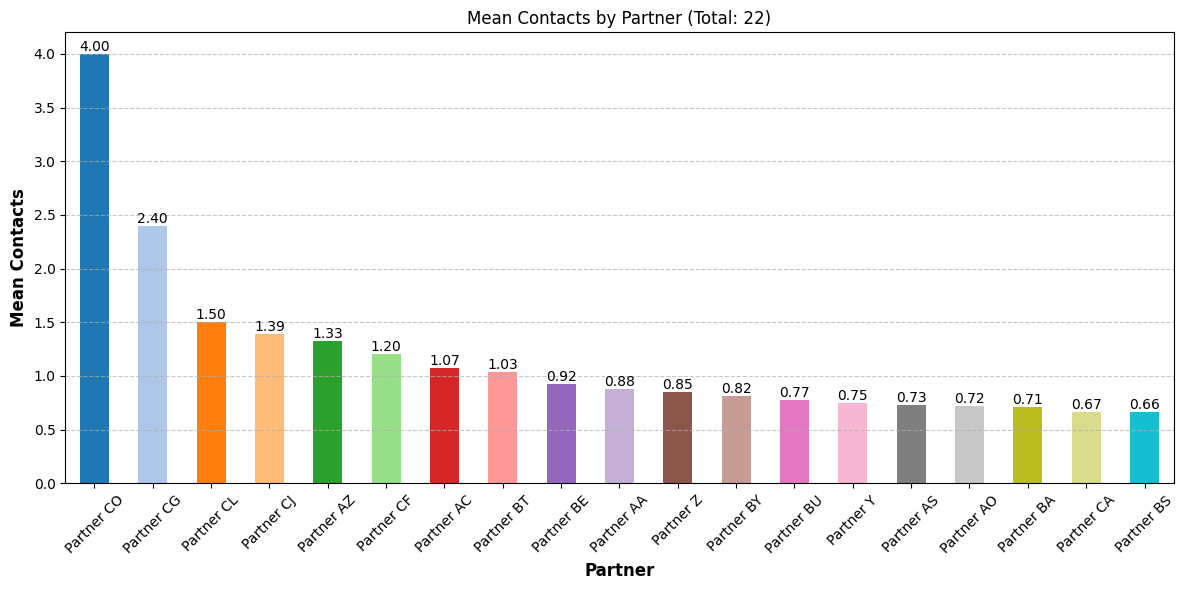

### Customer_group_type Stratification


### Stratified Statistics

| Group     | Count | Mean | StD | Min | 25% | 50% | 75% | Max | GlobOutlier | InGrpOutlier | Percentage Vector |
|-----------|-------|------|-----|-----|-----|-----|-----|-----|-------------|--------------|-------------------|
| COUPLE | 1655721 | 0.49 | 1.77 | 0 | 0.0 | 0.0 | 0.0 | 166 |  |  | [0.83 0.08 0.04 0.02 0.01 0.03] |
| FAMILY | 637471 | 0.70 | 2.36 | 0 | 0.0 | 0.0 | 0.0 | 196 |  |  | [0.78 0.09 0.05 0.03 0.02 0.04] |
| GROUP | 361720 | 0.60 | 2.11 | 0 | 0.0 | 0.0 | 0.0 | 243 |  |  | [0.80 0.08 0.04 0.02 0.01 0.03] |
| SINGLE | 3645294 | 0.39 | 1.52 | 0 | 0.0 | 0.0 | 0.0 | 173 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |


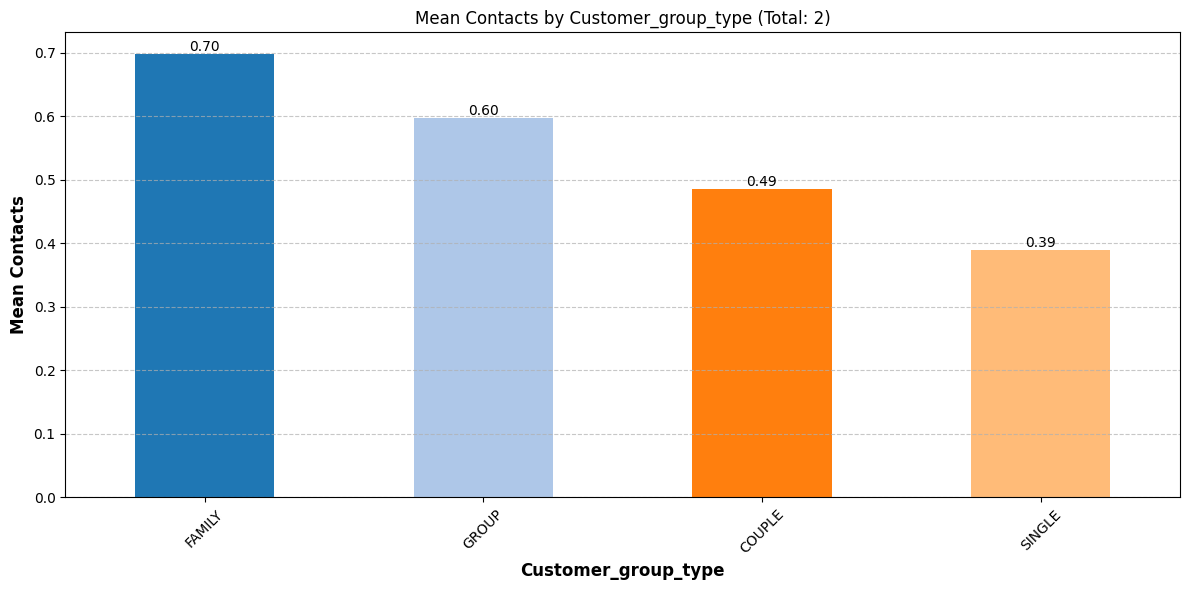

### Device Stratification


### Stratified Statistics

| Group     | Count | Mean | StD | Min | 25% | 50% | 75% | Max | GlobOutlier | InGrpOutlier | Percentage Vector |
|-----------|-------|------|-----|-----|-----|-----|-----|-----|-------------|--------------|-------------------|
| Android Phone | 1110813 | 0.45 | 1.72 | 0 | 0.0 | 0.0 | 0.0 | 184 |  |  | [0.84 0.07 0.03 0.02 0.01 0.02] |
| Android Tablet | 53784 | 0.48 | 1.85 | 0 | 0.0 | 0.0 | 0.0 | 77 |  |  | [0.84 0.07 0.03 0.02 0.01 0.03] |
| AnonPhone | 2991 | 0.59 | 1.72 | 0 | 0.0 | 0.0 | 0.0 | 30 |  |  | [0.78 0.10 0.05 0.03 0.02 0.03] |
| AnonTablet | 12 | 0.50 | 0.90 | 0 | 0.0 | 0.0 | 1.0 | 3 |  |  | [0.67 0.25 0.00 0.08 0.00 0.00] |
| Application | 2 | 1.50 | 2.12 | 0 | 0.75 | 1.5 | 2.25 | 3 |  |  | [0.50 0.00 0.00 0.50 0.00 0.00] |
| BlackBerry | 49 | 0.63 | 2.08 | 0 | 0.0 | 0.0 | 0.0 | 11 |  |  | [0.82 0.10 0.02 0.00 0.02 0.02] |
| PC | 2853489 | 0.47 | 1.75 | 0 | 0.0 | 0.0 | 0.0 | 196 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| Unknown | 46641 | 0.51 | 1.88 | 0 | 0.0 | 0.0 | 0.0 | 89 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| iPad | 67115 | 0.50 | 1.76 | 0 | 0.0 | 0.0 | 0.0 | 53 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| iPhone | 2165298 | 0.45 | 1.69 | 0 | 0.0 | 0.0 | 0.0 | 243 |  |  | [0.84 0.07 0.03 0.02 0.01 0.02] |
| iPod | 12 | 1.25 | 4.33 | 0 | 0.0 | 0.0 | 0.0 | 15 |  |  | [0.92 0.00 0.00 0.00 0.00 0.00] |


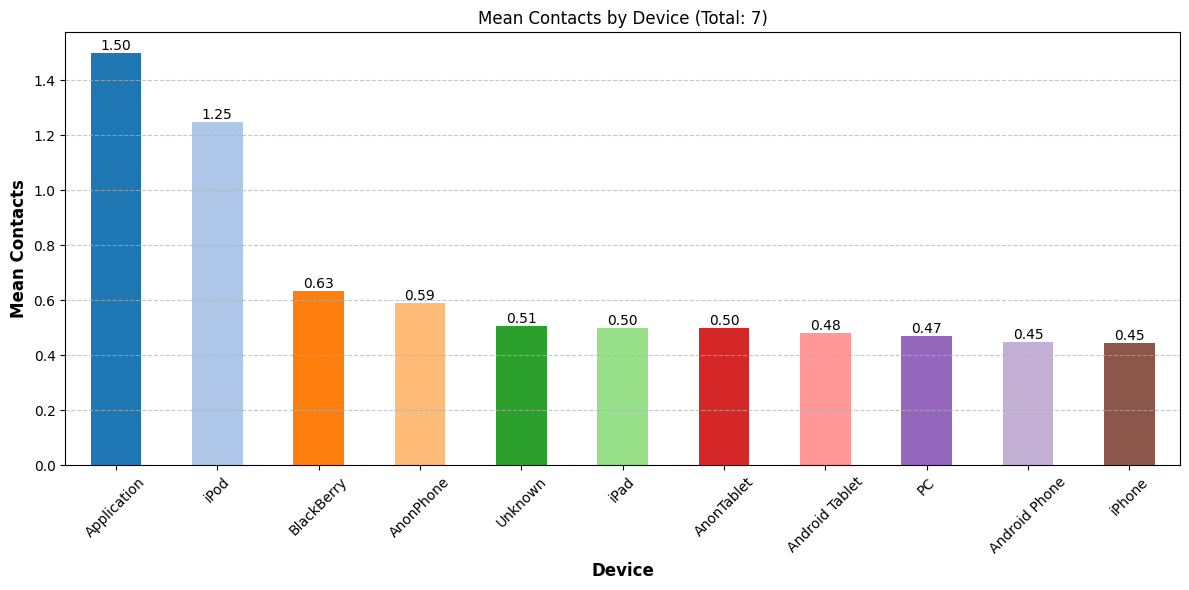

### Booking_system Stratification


### Stratified Statistics

| Group     | Count | Mean | StD | Min | 25% | 50% | 75% | Max | GlobOutlier | InGrpOutlier | Percentage Vector |
|-----------|-------|------|-----|-----|-----|-----|-----|-----|-------------|--------------|-------------------|
| System A | 2017384 | 0.51 | 1.91 | 0 | 0.0 | 0.0 | 0.0 | 176 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| System A,System B | 31255 | 0.70 | 2.17 | 0 | 0.0 | 0.0 | 0.0 | 91 |  |  | [0.77 0.10 0.05 0.03 0.02 0.04] |
| System A,System B,System C | 24 | 2.46 | 6.76 | 0 | 0.0 | 0.0 | 0.0 | 31 |  |  | [0.79 0.00 0.00 0.00 0.04 0.04] |
| System A,System B,System D | 616 | 1.54 | 3.83 | 0 | 0.0 | 0.0 | 2.0 | 50 |  |  | [0.64 0.11 0.06 0.06 0.04 0.09] |
| System A,System B,System D,System C | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System A,System B,System D,System E | 24 | 2.00 | 3.72 | 0 | 0.0 | 0.0 | 2.75 | 15 |  |  | [0.67 0.04 0.04 0.00 0.00 0.12] |
| System A,System B,System D,System G | 5 | 4.20 | 5.76 | 0 | 0.0 | 3.0 | 4.0 | 14 | * |  | [0.40 0.00 0.00 0.20 0.20 0.00] |
| System A,System B,System E | 141 | 1.52 | 3.39 | 0 | 0.0 | 0.0 | 2.0 | 24 |  |  | [0.66 0.09 0.06 0.04 0.06 0.10] |
| System A,System B,System E,System D | 8 | 2.50 | 3.07 | 0 | 0.75 | 1.5 | 2.75 | 9 |  |  | [0.25 0.25 0.25 0.00 0.00 0.00] |
| System A,System B,System G | 18 | 0.83 | 1.50 | 0 | 0.0 | 0.0 | 1.0 | 5 |  |  | [0.67 0.11 0.11 0.00 0.06 0.00] |
| System A,System B,System G,System D | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System A,System B,System G,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System A,System C | 6429 | 0.55 | 1.99 | 0 | 0.0 | 0.0 | 0.0 | 62 |  |  | [0.83 0.07 0.04 0.02 0.01 0.04] |
| System A,System C,System B | 9 | 1.56 | 2.60 | 0 | 0.0 | 0.0 | 1.0 | 7 |  |  | [0.56 0.22 0.00 0.00 0.00 0.00] |
| System A,System C,System B,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System A,System C,System D | 44 | 1.45 | 4.16 | 0 | 0.0 | 0.0 | 0.0 | 23 |  |  | [0.80 0.05 0.02 0.00 0.02 0.09] |
| System A,System C,System D,System E | 1 | 4.00 | nan | 4 | 4.0 | 4.0 | 4.0 | 4 |  |  | [0.00 0.00 0.00 0.00 1.00 0.00] |
| System A,System C,System D,System G | 2 | 1.50 | 2.12 | 0 | 0.75 | 1.5 | 2.25 | 3 |  |  | [0.50 0.00 0.00 0.50 0.00 0.00] |
| System A,System C,System E | 35 | 1.94 | 3.95 | 0 | 0.0 | 0.0 | 1.5 | 17 |  |  | [0.54 0.20 0.03 0.09 0.00 0.11] |
| System A,System C,System E,System D | 1 | 2.00 | nan | 2 | 2.0 | 2.0 | 2.0 | 2 |  |  | [0.00 0.00 1.00 0.00 0.00 0.00] |
| System A,System C,System G | 7 | 0.57 | 1.51 | 0 | 0.0 | 0.0 | 0.0 | 4 |  |  | [0.86 0.00 0.00 0.00 0.14 0.00] |
| System A,System D | 45745 | 0.72 | 2.22 | 0 | 0.0 | 0.0 | 0.0 | 67 |  |  | [0.78 0.09 0.05 0.03 0.02 0.04] |
| System A,System D,System B | 480 | 1.86 | 4.35 | 0 | 0.0 | 0.0 | 2.0 | 48 |  |  | [0.64 0.10 0.06 0.04 0.03 0.14] |
| System A,System D,System B,System C | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System A,System D,System B,System E | 19 | 2.16 | 3.13 | 0 | 0.0 | 1.0 | 3.5 | 12 |  |  | [0.47 0.11 0.11 0.05 0.05 0.21] |
| System A,System D,System B,System G | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System A,System D,System C | 111 | 1.23 | 2.68 | 0 | 0.0 | 0.0 | 1.0 | 16 |  |  | [0.67 0.10 0.07 0.07 0.00 0.08] |
| System A,System D,System E | 702 | 1.51 | 3.67 | 0 | 0.0 | 0.0 | 1.0 | 56 |  |  | [0.63 0.12 0.06 0.04 0.03 0.11] |
| System A,System D,System E,System B | 12 | 3.33 | 4.94 | 0 | 0.0 | 1.0 | 4.5 | 15 |  |  | [0.42 0.17 0.08 0.08 0.00 0.08] |
| System A,System D,System E,System B,System C | 1 | 2.00 | nan | 2 | 2.0 | 2.0 | 2.0 | 2 |  |  | [0.00 0.00 1.00 0.00 0.00 0.00] |
| System A,System D,System E,System G | 2 | 13.50 | 19.09 | 0 | 6.75 | 13.5 | 20.25 | 27 | * | * | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System A,System D,System G | 75 | 1.72 | 3.01 | 0 | 0.0 | 0.0 | 3.0 | 13 |  |  | [0.65 0.04 0.03 0.07 0.04 0.17] |
| System A,System D,System G,System B | 1 | 6.00 | nan | 6 | 6.0 | 6.0 | 6.0 | 6 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System A,System D,System G,System E | 2 | 11.50 | 12.02 | 3 | 7.25 | 11.5 | 15.75 | 20 | * | * | [0.00 0.00 0.00 0.50 0.00 0.00] |
| System A,System E | 49427 | 0.70 | 2.37 | 0 | 0.0 | 0.0 | 0.0 | 93 |  |  | [0.79 0.08 0.04 0.03 0.02 0.04] |
| System A,System E,System B | 141 | 1.96 | 4.15 | 0 | 0.0 | 0.0 | 2.0 | 23 |  |  | [0.58 0.16 0.08 0.02 0.02 0.14] |
| System A,System E,System B,System D | 20 | 2.80 | 6.72 | 0 | 0.0 | 0.0 | 3.25 | 30 |  |  | [0.55 0.15 0.00 0.05 0.10 0.05] |
| System A,System E,System C | 50 | 2.48 | 3.81 | 0 | 0.0 | 0.0 | 4.0 | 15 |  |  | [0.54 0.06 0.04 0.08 0.08 0.20] |
| System A,System E,System D | 452 | 1.69 | 3.48 | 0 | 0.0 | 0.0 | 2.0 | 26 |  |  | [0.60 0.12 0.08 0.04 0.03 0.13] |
| System A,System E,System D,System B | 6 | 1.17 | 2.86 | 0 | 0.0 | 0.0 | 0.0 | 7 |  |  | [0.83 0.00 0.00 0.00 0.00 0.00] |
| System A,System E,System D,System C | 2 | 8.50 | 10.61 | 1 | 4.75 | 8.5 | 12.25 | 16 | * | * | [0.00 0.50 0.00 0.00 0.00 0.00] |
| System A,System E,System D,System G | 2 | 0.50 | 0.71 | 0 | 0.25 | 0.5 | 0.75 | 1 |  |  | [0.50 0.50 0.00 0.00 0.00 0.00] |
| System A,System E,System F | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System A,System E,System G | 24 | 1.25 | 3.37 | 0 | 0.0 | 0.0 | 0.0 | 14 |  |  | [0.79 0.04 0.04 0.00 0.04 0.04] |
| System A,System E,System G,System D | 3 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System A,System F | 81 | 0.33 | 0.85 | 0 | 0.0 | 0.0 | 0.0 | 5 |  |  | [0.81 0.10 0.05 0.02 0.00 0.00] |
| System A,System G | 1087 | 1.08 | 3.64 | 0 | 0.0 | 0.0 | 0.0 | 63 |  |  | [0.75 0.08 0.05 0.03 0.02 0.07] |
| System A,System G,System B | 26 | 2.88 | 5.03 | 0 | 0.0 | 0.5 | 2.0 | 20 |  |  | [0.50 0.08 0.19 0.04 0.00 0.12] |
| System A,System G,System B,System D | 8 | 8.00 | 18.70 | 0 | 0.0 | 1.0 | 3.0 | 54 | * |  | [0.50 0.00 0.25 0.00 0.00 0.00] |
| System A,System G,System B,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System A,System G,System C | 5 | 1.20 | 2.17 | 0 | 0.0 | 0.0 | 1.0 | 5 |  |  | [0.60 0.20 0.00 0.00 0.00 0.00] |
| System A,System G,System D | 61 | 3.23 | 7.30 | 0 | 0.0 | 0.0 | 3.0 | 45 |  |  | [0.51 0.13 0.02 0.11 0.08 0.15] |
| System A,System G,System D,System E | 1 | 3.00 | nan | 3 | 3.0 | 3.0 | 3.0 | 3 |  |  | [0.00 0.00 0.00 1.00 0.00 0.00] |
| System A,System G,System E | 22 | 2.09 | 3.37 | 0 | 0.0 | 0.0 | 2.5 | 10 |  |  | [0.55 0.18 0.00 0.05 0.00 0.09] |
| System A,System G,System E,System D | 2 | 1.00 | 1.41 | 0 | 0.5 | 1.0 | 1.5 | 2 |  |  | [0.50 0.00 0.50 0.00 0.00 0.00] |
| System B | 1040133 | 0.38 | 1.43 | 0 | 0.0 | 0.0 | 0.0 | 243 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| System B,System A | 30990 | 0.72 | 2.30 | 0 | 0.0 | 0.0 | 0.0 | 96 |  |  | [0.77 0.09 0.05 0.03 0.02 0.04] |
| System B,System A,System C | 23 | 0.78 | 1.70 | 0 | 0.0 | 0.0 | 0.5 | 7 |  |  | [0.74 0.04 0.13 0.00 0.04 0.00] |
| System B,System A,System D | 443 | 1.64 | 3.53 | 0 | 0.0 | 0.0 | 2.0 | 27 |  |  | [0.63 0.10 0.07 0.04 0.04 0.12] |
| System B,System A,System D,System C | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System A,System D,System E | 17 | 3.29 | 4.69 | 0 | 0.0 | 1.0 | 6.0 | 16 |  |  | [0.47 0.12 0.06 0.00 0.00 0.24] |
| System B,System A,System D,System G | 4 | 2.00 | 4.00 | 0 | 0.0 | 0.0 | 2.0 | 8 |  |  | [0.75 0.00 0.00 0.00 0.00 0.00] |
| System B,System A,System E | 151 | 1.86 | 3.47 | 0 | 0.0 | 0.0 | 2.0 | 21 |  |  | [0.57 0.09 0.11 0.04 0.07 0.13] |
| System B,System A,System E,System C | 1 | 2.00 | nan | 2 | 2.0 | 2.0 | 2.0 | 2 |  |  | [0.00 0.00 1.00 0.00 0.00 0.00] |
| System B,System A,System E,System D | 12 | 0.58 | 1.24 | 0 | 0.0 | 0.0 | 0.25 | 4 |  |  | [0.75 0.08 0.08 0.00 0.08 0.00] |
| System B,System A,System G | 16 | 0.88 | 1.89 | 0 | 0.0 | 0.0 | 0.5 | 7 |  |  | [0.75 0.00 0.12 0.06 0.00 0.00] |
| System B,System A,System G,System D | 3 | 0.33 | 0.58 | 0 | 0.0 | 0.0 | 0.5 | 1 |  |  | [0.67 0.33 0.00 0.00 0.00 0.00] |
| System B,System C | 2960 | 0.58 | 1.73 | 0 | 0.0 | 0.0 | 0.0 | 21 |  |  | [0.81 0.08 0.04 0.02 0.02 0.04] |
| System B,System C,System A | 11 | 2.91 | 7.87 | 0 | 0.0 | 0.0 | 0.0 | 26 |  |  | [0.82 0.00 0.00 0.00 0.00 0.00] |
| System B,System C,System D | 10 | 2.30 | 4.90 | 0 | 0.0 | 0.0 | 0.0 | 13 |  |  | [0.80 0.00 0.00 0.00 0.00 0.00] |
| System B,System C,System E | 3 | 1.00 | 1.00 | 0 | 0.5 | 1.0 | 1.5 | 2 |  |  | [0.33 0.33 0.33 0.00 0.00 0.00] |
| System B,System C,System E,System A | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System C,System E,System G | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System C,System G,System D | 1 | 9.00 | nan | 9 | 9.0 | 9.0 | 9.0 | 9 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System D | 36341 | 0.65 | 2.11 | 0 | 0.0 | 0.0 | 0.0 | 90 |  |  | [0.78 0.09 0.05 0.03 0.02 0.04] |
| System B,System D,System A | 448 | 1.98 | 4.18 | 0 | 0.0 | 0.0 | 2.0 | 28 |  |  | [0.60 0.11 0.06 0.04 0.05 0.14] |
| System B,System D,System A,System C | 4 | 3.50 | 4.73 | 0 | 0.0 | 2.0 | 5.5 | 10 |  |  | [0.50 0.00 0.00 0.00 0.25 0.00] |
| System B,System D,System A,System E | 13 | 3.23 | 7.87 | 0 | 0.0 | 1.0 | 2.0 | 29 |  |  | [0.38 0.31 0.15 0.00 0.00 0.00] |
| System B,System D,System A,System G | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System D,System C | 32 | 1.81 | 5.57 | 0 | 0.0 | 0.0 | 1.25 | 31 |  |  | [0.69 0.06 0.09 0.00 0.06 0.06] |
| System B,System D,System C,System A | 2 | 2.00 | 1.41 | 1 | 1.5 | 2.0 | 2.5 | 3 |  |  | [0.00 0.50 0.00 0.50 0.00 0.00] |
| System B,System D,System C,System A,System E | 1 | 23.00 | nan | 23 | 23.0 | 23.0 | 23.0 | 23 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System D,System E | 184 | 1.60 | 3.32 | 0 | 0.0 | 0.0 | 2.0 | 22 |  |  | [0.58 0.14 0.10 0.05 0.03 0.11] |
| System B,System D,System E,System A | 8 | 2.50 | 2.88 | 0 | 0.0 | 1.5 | 5.0 | 7 |  |  | [0.50 0.00 0.00 0.12 0.00 0.00] |
| System B,System D,System G | 37 | 2.51 | 4.66 | 0 | 0.0 | 0.0 | 2.0 | 19 |  |  | [0.62 0.05 0.08 0.03 0.03 0.19] |
| System B,System D,System G,System A | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System E | 12626 | 0.72 | 2.34 | 0 | 0.0 | 0.0 | 0.0 | 98 |  |  | [0.77 0.10 0.05 0.03 0.02 0.04] |
| System B,System E,System A | 134 | 2.79 | 5.85 | 0 | 0.0 | 0.0 | 3.0 | 43 |  |  | [0.56 0.07 0.10 0.04 0.06 0.18] |
| System B,System E,System A,System C | 2 | 3.50 | 2.12 | 2 | 2.75 | 3.5 | 4.25 | 5 |  |  | [0.00 0.00 0.50 0.00 0.00 0.00] |
| System B,System E,System A,System D | 17 | 1.47 | 2.32 | 0 | 0.0 | 0.0 | 3.0 | 6 |  |  | [0.65 0.06 0.00 0.06 0.06 0.12] |
| System B,System E,System C | 8 | 0.75 | 0.89 | 0 | 0.0 | 0.5 | 1.25 | 2 |  |  | [0.50 0.25 0.25 0.00 0.00 0.00] |
| System B,System E,System C,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System E,System D | 185 | 1.17 | 2.68 | 0 | 0.0 | 0.0 | 1.0 | 17 |  |  | [0.69 0.12 0.05 0.04 0.02 0.09] |
| System B,System E,System D,System A | 10 | 2.90 | 7.82 | 0 | 0.0 | 0.0 | 0.75 | 25 |  |  | [0.70 0.10 0.00 0.10 0.00 0.00] |
| System B,System E,System D,System C | 2 | 1.00 | 1.41 | 0 | 0.5 | 1.0 | 1.5 | 2 |  |  | [0.50 0.00 0.50 0.00 0.00 0.00] |
| System B,System E,System G | 5 | 5.20 | 7.79 | 0 | 2.0 | 2.0 | 3.0 | 19 | * |  | [0.20 0.00 0.40 0.20 0.00 0.00] |
| System B,System E,System G,System A | 2 | 15.50 | 21.92 | 0 | 7.75 | 15.5 | 23.25 | 31 | * | * | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System B,System E,System G,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System F | 43 | 0.53 | 1.35 | 0 | 0.0 | 0.0 | 0.0 | 6 |  |  | [0.81 0.05 0.05 0.05 0.00 0.02] |
| System B,System G | 363 | 1.01 | 3.36 | 0 | 0.0 | 0.0 | 0.0 | 37 |  |  | [0.78 0.07 0.04 0.04 0.01 0.06] |
| System B,System G,System A | 18 | 5.33 | 7.87 | 0 | 0.0 | 2.0 | 8.5 | 32 | * |  | [0.39 0.11 0.00 0.06 0.00 0.28] |
| System B,System G,System A,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System B,System G,System D | 40 | 1.38 | 2.63 | 0 | 0.0 | 0.0 | 1.0 | 10 |  |  | [0.62 0.15 0.05 0.02 0.02 0.12] |
| System B,System G,System D,System A | 2 | 3.00 | 1.41 | 2 | 2.5 | 3.0 | 3.5 | 4 |  |  | [0.00 0.00 0.50 0.00 0.50 0.00] |
| System B,System G,System E | 4 | 0.75 | 0.96 | 0 | 0.0 | 0.5 | 1.25 | 2 |  |  | [0.50 0.25 0.25 0.00 0.00 0.00] |
| System B,System G,System E,System A | 2 | 0.50 | 0.71 | 0 | 0.25 | 0.5 | 0.75 | 1 |  |  | [0.50 0.50 0.00 0.00 0.00 0.00] |
| System B,System G,System E,System D | 4 | 0.50 | 1.00 | 0 | 0.0 | 0.0 | 0.5 | 2 |  |  | [0.75 0.00 0.25 0.00 0.00 0.00] |
| System B,System G,System F | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C | 364004 | 0.39 | 1.58 | 0 | 0.0 | 0.0 | 0.0 | 184 |  |  | [0.86 0.06 0.03 0.02 0.01 0.02] |
| System C,System A | 4734 | 0.57 | 1.80 | 0 | 0.0 | 0.0 | 0.0 | 22 |  |  | [0.81 0.07 0.04 0.02 0.01 0.03] |
| System C,System A,System B | 15 | 1.13 | 1.85 | 0 | 0.0 | 0.0 | 1.5 | 6 |  |  | [0.60 0.13 0.07 0.07 0.07 0.07] |
| System C,System A,System B,System D | 3 | 4.00 | 4.58 | 0 | 1.5 | 3.0 | 6.0 | 9 | * |  | [0.33 0.00 0.00 0.33 0.00 0.00] |
| System C,System A,System B,System E | 1 | 9.00 | nan | 9 | 9.0 | 9.0 | 9.0 | 9 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System A,System D | 73 | 0.88 | 2.01 | 0 | 0.0 | 0.0 | 0.0 | 11 |  |  | [0.75 0.08 0.01 0.03 0.05 0.07] |
| System C,System A,System D,System B | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System A,System D,System E | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System C,System A,System E | 33 | 0.67 | 1.49 | 0 | 0.0 | 0.0 | 1.0 | 8 |  |  | [0.64 0.27 0.03 0.03 0.00 0.00] |
| System C,System A,System E,System B,System D | 1 | 4.00 | nan | 4 | 4.0 | 4.0 | 4.0 | 4 |  |  | [0.00 0.00 0.00 0.00 1.00 0.00] |
| System C,System A,System E,System D | 4 | 4.50 | 3.32 | 1 | 3.25 | 4.0 | 5.25 | 9 | * |  | [0.00 0.25 0.00 0.00 0.50 0.00] |
| System C,System A,System G | 6 | 0.50 | 0.84 | 0 | 0.0 | 0.0 | 0.75 | 2 |  |  | [0.67 0.17 0.17 0.00 0.00 0.00] |
| System C,System A,System G,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System B | 1955 | 0.64 | 2.12 | 0 | 0.0 | 0.0 | 0.0 | 33 |  |  | [0.80 0.09 0.03 0.02 0.01 0.04] |
| System C,System B,System A | 19 | 1.26 | 1.66 | 0 | 0.0 | 0.0 | 2.0 | 5 |  |  | [0.53 0.11 0.16 0.05 0.11 0.05] |
| System C,System B,System A,System D | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System C,System B,System D | 36 | 0.81 | 1.53 | 0 | 0.0 | 0.0 | 1.0 | 5 |  |  | [0.69 0.11 0.06 0.06 0.00 0.00] |
| System C,System B,System D,System A | 3 | 3.33 | 4.93 | 0 | 0.5 | 1.0 | 5.0 | 9 |  |  | [0.33 0.33 0.00 0.00 0.00 0.00] |
| System C,System B,System D,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System B,System E | 8 | 0.75 | 1.39 | 0 | 0.0 | 0.0 | 0.75 | 3 |  |  | [0.75 0.00 0.00 0.25 0.00 0.00] |
| System C,System B,System E,System D | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System C,System B,System G | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System B,System G,System A | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System C,System D | 5765 | 0.50 | 1.63 | 0 | 0.0 | 0.0 | 0.0 | 29 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| System C,System D,System A | 117 | 1.85 | 3.69 | 0 | 0.0 | 0.0 | 2.0 | 20 |  |  | [0.63 0.09 0.07 0.05 0.02 0.15] |
| System C,System D,System A,System B | 3 | 0.67 | 0.58 | 0 | 0.5 | 1.0 | 1.0 | 1 |  |  | [0.33 0.67 0.00 0.00 0.00 0.00] |
| System C,System D,System A,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System D,System B | 49 | 1.33 | 2.63 | 0 | 0.0 | 0.0 | 1.0 | 12 |  |  | [0.63 0.14 0.04 0.06 0.02 0.10] |
| System C,System D,System B,System A | 6 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System D,System E | 32 | 1.47 | 3.15 | 0 | 0.0 | 0.0 | 1.25 | 14 |  |  | [0.66 0.09 0.06 0.06 0.03 0.09] |
| System C,System D,System E,System A | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System D,System G | 2 | 1.00 | 1.41 | 0 | 0.5 | 1.0 | 1.5 | 2 |  |  | [0.50 0.00 0.50 0.00 0.00 0.00] |
| System C,System D,System G,System A | 1 | 4.00 | nan | 4 | 4.0 | 4.0 | 4.0 | 4 |  |  | [0.00 0.00 0.00 0.00 1.00 0.00] |
| System C,System D,System G,System E | 1 | 12.00 | nan | 12 | 12.0 | 12.0 | 12.0 | 12 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System E | 2082 | 0.55 | 1.80 | 0 | 0.0 | 0.0 | 0.0 | 27 |  |  | [0.82 0.07 0.04 0.02 0.02 0.04] |
| System C,System E,System A | 28 | 0.64 | 2.28 | 0 | 0.0 | 0.0 | 0.0 | 12 |  |  | [0.79 0.14 0.04 0.00 0.00 0.00] |
| System C,System E,System A,System B | 1 | 4.00 | nan | 4 | 4.0 | 4.0 | 4.0 | 4 |  |  | [0.00 0.00 0.00 0.00 1.00 0.00] |
| System C,System E,System B | 2 | 1.00 | 1.41 | 0 | 0.5 | 1.0 | 1.5 | 2 |  |  | [0.50 0.00 0.50 0.00 0.00 0.00] |
| System C,System E,System B,System A | 2 | 5.50 | 7.78 | 0 | 2.75 | 5.5 | 8.25 | 11 | * |  | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System C,System E,System B,System A,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System E,System D | 36 | 1.81 | 3.01 | 0 | 0.0 | 0.0 | 3.0 | 12 |  |  | [0.58 0.08 0.03 0.14 0.03 0.14] |
| System C,System E,System D,System A | 1 | 3.00 | nan | 3 | 3.0 | 3.0 | 3.0 | 3 |  |  | [0.00 0.00 0.00 1.00 0.00 0.00] |
| System C,System E,System D,System B | 2 | 3.00 | 1.41 | 2 | 2.5 | 3.0 | 3.5 | 4 |  |  | [0.00 0.00 0.50 0.00 0.50 0.00] |
| System C,System E,System G | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System F | 55 | 0.15 | 0.52 | 0 | 0.0 | 0.0 | 0.0 | 3 |  |  | [0.91 0.05 0.02 0.02 0.00 0.00] |
| System C,System F,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System G | 31 | 0.42 | 1.03 | 0 | 0.0 | 0.0 | 0.0 | 4 |  |  | [0.81 0.10 0.00 0.06 0.03 0.00] |
| System C,System G,System A | 2 | 3.50 | 0.71 | 3 | 3.25 | 3.5 | 3.75 | 4 |  |  | [0.00 0.00 0.00 0.50 0.50 0.00] |
| System C,System G,System B | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System C,System G,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D | 1208324 | 0.34 | 1.31 | 0 | 0.0 | 0.0 | 0.0 | 117 |  |  | [0.86 0.07 0.03 0.02 0.01 0.02] |
| System D,System A | 42236 | 0.70 | 2.36 | 0 | 0.0 | 0.0 | 0.0 | 196 |  |  | [0.78 0.08 0.05 0.03 0.02 0.04] |
| System D,System A,System B | 515 | 1.74 | 4.17 | 0 | 0.0 | 0.0 | 2.0 | 43 |  |  | [0.63 0.10 0.07 0.04 0.03 0.13] |
| System D,System A,System B,System C | 3 | 2.00 | 1.00 | 1 | 1.5 | 2.0 | 2.5 | 3 |  |  | [0.00 0.33 0.33 0.33 0.00 0.00] |
| System D,System A,System B,System E | 15 | 1.27 | 1.53 | 0 | 0.0 | 1.0 | 2.0 | 5 |  |  | [0.47 0.13 0.20 0.13 0.00 0.00] |
| System D,System A,System B,System G | 5 | 0.40 | 0.89 | 0 | 0.0 | 0.0 | 0.0 | 2 |  |  | [0.80 0.00 0.20 0.00 0.00 0.00] |
| System D,System A,System C | 69 | 0.96 | 1.97 | 0 | 0.0 | 0.0 | 1.0 | 13 |  |  | [0.62 0.14 0.12 0.06 0.03 0.03] |
| System D,System A,System C,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System A,System E | 384 | 1.62 | 3.50 | 0 | 0.0 | 0.0 | 1.25 | 27 |  |  | [0.64 0.11 0.04 0.06 0.02 0.12] |
| System D,System A,System E,System B | 16 | 2.12 | 2.85 | 0 | 0.0 | 0.0 | 4.0 | 8 |  |  | [0.56 0.00 0.00 0.12 0.19 0.00] |
| System D,System A,System E,System C | 4 | 1.50 | 1.73 | 0 | 0.0 | 1.5 | 3.0 | 3 |  |  | [0.50 0.00 0.00 0.50 0.00 0.00] |
| System D,System A,System E,System G | 4 | 3.00 | 3.16 | 0 | 0.75 | 2.5 | 4.75 | 7 |  |  | [0.25 0.25 0.00 0.00 0.25 0.00] |
| System D,System A,System F | 2 | 1.00 | 1.41 | 0 | 0.5 | 1.0 | 1.5 | 2 |  |  | [0.50 0.00 0.50 0.00 0.00 0.00] |
| System D,System A,System G | 80 | 2.26 | 4.35 | 0 | 0.0 | 0.0 | 2.25 | 24 |  |  | [0.57 0.11 0.06 0.04 0.02 0.19] |
| System D,System A,System G,System B | 2 | 0.50 | 0.71 | 0 | 0.25 | 0.5 | 0.75 | 1 |  |  | [0.50 0.50 0.00 0.00 0.00 0.00] |
| System D,System A,System G,System C | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System A,System G,System E | 4 | 7.25 | 6.40 | 0 | 3.0 | 7.5 | 11.75 | 14 | * |  | [0.25 0.00 0.00 0.00 0.25 0.00] |
| System D,System A,System G,System E,System B | 1 | 5.00 | nan | 5 | 5.0 | 5.0 | 5.0 | 5 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System B | 33996 | 0.65 | 2.06 | 0 | 0.0 | 0.0 | 0.0 | 75 |  |  | [0.78 0.10 0.04 0.03 0.02 0.04] |
| System D,System B,System A | 472 | 1.89 | 4.35 | 0 | 0.0 | 0.0 | 2.0 | 33 |  |  | [0.61 0.13 0.06 0.04 0.03 0.13] |
| System D,System B,System A,System C | 2 | 3.00 | 4.24 | 0 | 1.5 | 3.0 | 4.5 | 6 |  |  | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System D,System B,System A,System E | 8 | 2.50 | 5.95 | 0 | 0.0 | 0.0 | 0.75 | 17 |  |  | [0.75 0.00 0.00 0.12 0.00 0.00] |
| System D,System B,System C | 40 | 0.93 | 1.67 | 0 | 0.0 | 0.0 | 1.0 | 6 |  |  | [0.65 0.15 0.05 0.02 0.08 0.05] |
| System D,System B,System C,System E | 2 | 2.00 | 2.83 | 0 | 1.0 | 2.0 | 3.0 | 4 |  |  | [0.50 0.00 0.00 0.00 0.50 0.00] |
| System D,System B,System E | 233 | 2.44 | 6.37 | 0 | 0.0 | 0.0 | 2.0 | 58 |  |  | [0.59 0.09 0.07 0.06 0.03 0.15] |
| System D,System B,System E,System A | 15 | 1.47 | 1.88 | 0 | 0.0 | 1.0 | 2.0 | 6 |  |  | [0.47 0.13 0.20 0.00 0.13 0.00] |
| System D,System B,System G | 32 | 1.50 | 2.41 | 0 | 0.0 | 0.5 | 2.25 | 10 |  |  | [0.50 0.22 0.03 0.12 0.03 0.09] |
| System D,System B,System G,System A | 1 | 3.00 | nan | 3 | 3.0 | 3.0 | 3.0 | 3 |  |  | [0.00 0.00 0.00 1.00 0.00 0.00] |
| System D,System C | 7448 | 0.42 | 1.37 | 0 | 0.0 | 0.0 | 0.0 | 25 |  |  | [0.83 0.08 0.03 0.02 0.01 0.02] |
| System D,System C,System A | 31 | 0.74 | 1.46 | 0 | 0.0 | 0.0 | 1.0 | 6 |  |  | [0.68 0.16 0.06 0.00 0.06 0.00] |
| System D,System C,System A,System B | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System D,System C,System A,System E | 5 | 1.20 | 1.30 | 0 | 0.0 | 1.0 | 2.0 | 3 |  |  | [0.40 0.20 0.20 0.20 0.00 0.00] |
| System D,System C,System B | 12 | 2.25 | 7.17 | 0 | 0.0 | 0.0 | 0.25 | 25 |  |  | [0.75 0.17 0.00 0.00 0.00 0.00] |
| System D,System C,System E | 15 | 0.93 | 1.87 | 0 | 0.0 | 0.0 | 1.5 | 7 |  |  | [0.67 0.07 0.20 0.00 0.00 0.00] |
| System D,System C,System E,System A | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System C,System G | 1 | 2.00 | nan | 2 | 2.0 | 2.0 | 2.0 | 2 |  |  | [0.00 0.00 1.00 0.00 0.00 0.00] |
| System D,System E | 23138 | 0.66 | 2.03 | 0 | 0.0 | 0.0 | 0.0 | 71 |  |  | [0.78 0.09 0.05 0.03 0.02 0.04] |
| System D,System E,System A | 432 | 1.55 | 3.62 | 0 | 0.0 | 0.0 | 2.0 | 39 |  |  | [0.63 0.10 0.07 0.07 0.03 0.10] |
| System D,System E,System A,System B | 17 | 1.35 | 2.85 | 0 | 0.0 | 0.0 | 1.0 | 11 |  |  | [0.65 0.12 0.06 0.06 0.00 0.06] |
| System D,System E,System A,System G | 3 | 5.00 | 5.00 | 0 | 2.5 | 5.0 | 7.5 | 10 | * |  | [0.33 0.00 0.00 0.00 0.00 0.00] |
| System D,System E,System B | 200 | 1.91 | 4.14 | 0 | 0.0 | 0.0 | 2.0 | 34 |  |  | [0.60 0.10 0.07 0.07 0.02 0.13] |
| System D,System E,System B,System A | 10 | 0.80 | 1.14 | 0 | 0.0 | 0.0 | 1.75 | 3 |  |  | [0.60 0.10 0.20 0.10 0.00 0.00] |
| System D,System E,System B,System G | 1 | 5.00 | nan | 5 | 5.0 | 5.0 | 5.0 | 5 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System E,System C | 33 | 0.73 | 1.66 | 0 | 0.0 | 0.0 | 1.0 | 7 |  |  | [0.73 0.12 0.06 0.03 0.00 0.03] |
| System D,System E,System G | 22 | 3.45 | 10.79 | 0 | 0.0 | 0.0 | 2.5 | 51 |  |  | [0.55 0.18 0.00 0.14 0.00 0.05] |
| System D,System E,System G,System A | 2 | 7.00 | 9.90 | 0 | 3.5 | 7.0 | 10.5 | 14 | * |  | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System D,System E,System G,System B | 1 | 12.00 | nan | 12 | 12.0 | 12.0 | 12.0 | 12 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System F | 45 | 0.33 | 0.74 | 0 | 0.0 | 0.0 | 0.0 | 4 |  |  | [0.76 0.20 0.02 0.00 0.02 0.00] |
| System D,System F,System A | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System G | 1342 | 1.04 | 3.15 | 0 | 0.0 | 0.0 | 1.0 | 43 |  |  | [0.74 0.10 0.05 0.02 0.02 0.07] |
| System D,System G,System A | 88 | 2.23 | 3.87 | 0 | 0.0 | 0.0 | 3.0 | 19 |  |  | [0.52 0.12 0.09 0.07 0.01 0.18] |
| System D,System G,System A,System B | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System G,System A,System C | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System G,System A,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System G,System B | 49 | 1.59 | 3.04 | 0 | 0.0 | 0.0 | 2.0 | 18 |  |  | [0.55 0.16 0.04 0.08 0.04 0.12] |
| System D,System G,System B,System A | 5 | 3.80 | 5.36 | 0 | 1.0 | 1.0 | 4.0 | 13 |  |  | [0.20 0.40 0.00 0.00 0.20 0.00] |
| System D,System G,System B,System E | 1 | 3.00 | nan | 3 | 3.0 | 3.0 | 3.0 | 3 |  |  | [0.00 0.00 0.00 1.00 0.00 0.00] |
| System D,System G,System C | 2 | 1.00 | 1.41 | 0 | 0.5 | 1.0 | 1.5 | 2 |  |  | [0.50 0.00 0.50 0.00 0.00 0.00] |
| System D,System G,System E | 33 | 1.12 | 2.37 | 0 | 0.0 | 0.0 | 1.0 | 11 |  |  | [0.67 0.15 0.00 0.06 0.03 0.06] |
| System D,System G,System E,System B | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System D,System G,System F | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E | 1114849 | 0.49 | 1.82 | 0 | 0.0 | 0.0 | 0.0 | 139 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| System E,System A | 41752 | 0.70 | 2.26 | 0 | 0.0 | 0.0 | 0.0 | 96 |  |  | [0.78 0.09 0.05 0.03 0.02 0.04] |
| System E,System A,System B | 141 | 1.66 | 3.03 | 0 | 0.0 | 0.0 | 2.0 | 22 |  |  | [0.61 0.05 0.11 0.06 0.04 0.14] |
| System E,System A,System B,System C | 1 | 3.00 | nan | 3 | 3.0 | 3.0 | 3.0 | 3 |  |  | [0.00 0.00 0.00 1.00 0.00 0.00] |
| System E,System A,System B,System D | 16 | 3.44 | 4.08 | 0 | 0.0 | 2.0 | 5.0 | 13 |  |  | [0.38 0.06 0.12 0.00 0.06 0.19] |
| System E,System A,System B,System D,System G | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System A,System B,System G | 1 | 8.00 | nan | 8 | 8.0 | 8.0 | 8.0 | 8 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System A,System B,System G,System D | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System A,System C | 29 | 1.79 | 4.81 | 0 | 0.0 | 0.0 | 2.0 | 25 |  |  | [0.66 0.07 0.07 0.10 0.03 0.07] |
| System E,System A,System C,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System A,System D | 427 | 1.37 | 3.52 | 0 | 0.0 | 0.0 | 1.0 | 38 |  |  | [0.69 0.10 0.06 0.04 0.03 0.09] |
| System E,System A,System D,System B | 9 | 3.44 | 3.61 | 0 | 0.0 | 4.0 | 5.0 | 9 |  |  | [0.44 0.00 0.00 0.00 0.11 0.00] |
| System E,System A,System D,System C | 1 | 4.00 | nan | 4 | 4.0 | 4.0 | 4.0 | 4 |  |  | [0.00 0.00 0.00 0.00 1.00 0.00] |
| System E,System A,System D,System G | 2 | 15.50 | 20.51 | 1 | 8.25 | 15.5 | 22.75 | 30 | * | * | [0.00 0.50 0.00 0.00 0.00 0.00] |
| System E,System A,System G | 30 | 2.50 | 5.44 | 0 | 0.0 | 0.0 | 2.0 | 27 |  |  | [0.53 0.17 0.07 0.03 0.00 0.13] |
| System E,System A,System G,System B | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System A,System G,System D | 3 | 6.67 | 10.69 | 0 | 0.5 | 1.0 | 10.0 | 19 | * |  | [0.33 0.33 0.00 0.00 0.00 0.00] |
| System E,System B | 11963 | 0.70 | 2.19 | 0 | 0.0 | 0.0 | 0.0 | 39 |  |  | [0.78 0.08 0.05 0.03 0.02 0.04] |
| System E,System B,System A | 118 | 2.30 | 6.50 | 0 | 0.0 | 0.0 | 2.0 | 57 |  |  | [0.63 0.08 0.05 0.08 0.03 0.12] |
| System E,System B,System A,System D | 8 | 2.12 | 4.12 | 0 | 0.0 | 0.5 | 1.5 | 12 |  |  | [0.50 0.25 0.00 0.12 0.00 0.00] |
| System E,System B,System A,System D,System G | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System E,System B,System A,System G | 2 | 0.50 | 0.71 | 0 | 0.25 | 0.5 | 0.75 | 1 |  |  | [0.50 0.50 0.00 0.00 0.00 0.00] |
| System E,System B,System C | 7 | 1.57 | 1.90 | 0 | 0.0 | 1.0 | 2.5 | 5 |  |  | [0.43 0.14 0.14 0.14 0.00 0.00] |
| System E,System B,System C,System G | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System B,System D | 229 | 1.34 | 3.33 | 0 | 0.0 | 0.0 | 1.0 | 27 |  |  | [0.66 0.12 0.08 0.04 0.01 0.10] |
| System E,System B,System D,System A | 20 | 3.25 | 5.24 | 0 | 0.0 | 0.5 | 4.25 | 21 |  |  | [0.50 0.05 0.00 0.10 0.10 0.20] |
| System E,System B,System D,System A,System G | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System B,System D,System G | 2 | 2.50 | 3.54 | 0 | 1.25 | 2.5 | 3.75 | 5 |  |  | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System E,System B,System G | 8 | 1.88 | 3.76 | 0 | 0.0 | 0.5 | 1.25 | 11 |  |  | [0.50 0.25 0.12 0.00 0.00 0.00] |
| System E,System B,System G,System D | 2 | 4.50 | 6.36 | 0 | 2.25 | 4.5 | 6.75 | 9 | * |  | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System E,System C | 2118 | 0.43 | 1.56 | 0 | 0.0 | 0.0 | 0.0 | 24 |  |  | [0.86 0.06 0.03 0.02 0.01 0.03] |
| System E,System C,System A | 22 | 1.77 | 7.66 | 0 | 0.0 | 0.0 | 0.0 | 36 |  |  | [0.86 0.05 0.05 0.00 0.00 0.00] |
| System E,System C,System A,System D | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System E,System C,System B | 6 | 2.17 | 2.99 | 0 | 0.0 | 0.5 | 4.75 | 6 |  |  | [0.50 0.17 0.00 0.00 0.00 0.00] |
| System E,System C,System B,System A | 1 | 2.00 | nan | 2 | 2.0 | 2.0 | 2.0 | 2 |  |  | [0.00 0.00 1.00 0.00 0.00 0.00] |
| System E,System C,System B,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System C,System B,System G | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System C,System D | 12 | 0.25 | 0.87 | 0 | 0.0 | 0.0 | 0.0 | 3 |  |  | [0.92 0.00 0.00 0.08 0.00 0.00] |
| System E,System C,System D,System A | 2 | 10.50 | 14.85 | 0 | 5.25 | 10.5 | 15.75 | 21 | * | * | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System E,System C,System D,System B | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System D | 22528 | 0.72 | 2.35 | 0 | 0.0 | 0.0 | 0.0 | 144 |  |  | [0.78 0.09 0.05 0.03 0.02 0.04] |
| System E,System D,System A | 612 | 1.62 | 4.05 | 0 | 0.0 | 0.0 | 1.0 | 45 |  |  | [0.63 0.13 0.07 0.04 0.03 0.10] |
| System E,System D,System A,System B | 10 | 3.70 | 6.31 | 0 | 0.0 | 0.0 | 5.75 | 19 |  |  | [0.60 0.00 0.10 0.00 0.00 0.00] |
| System E,System D,System A,System G | 2 | 1.50 | 2.12 | 0 | 0.75 | 1.5 | 2.25 | 3 |  |  | [0.50 0.00 0.00 0.50 0.00 0.00] |
| System E,System D,System B | 193 | 2.33 | 5.83 | 0 | 0.0 | 0.0 | 2.0 | 41 |  |  | [0.55 0.15 0.07 0.07 0.04 0.13] |
| System E,System D,System B,System A | 18 | 1.61 | 2.93 | 0 | 0.0 | 0.0 | 1.75 | 11 |  |  | [0.61 0.11 0.06 0.00 0.06 0.06] |
| System E,System D,System B,System C | 1 | 2.00 | nan | 2 | 2.0 | 2.0 | 2.0 | 2 |  |  | [0.00 0.00 1.00 0.00 0.00 0.00] |
| System E,System D,System B,System G | 1 | 3.00 | nan | 3 | 3.0 | 3.0 | 3.0 | 3 |  |  | [0.00 0.00 0.00 1.00 0.00 0.00] |
| System E,System D,System C | 31 | 0.74 | 2.08 | 0 | 0.0 | 0.0 | 0.0 | 9 |  |  | [0.84 0.03 0.03 0.00 0.00 0.03] |
| System E,System D,System C,System A | 3 | 2.00 | 3.46 | 0 | 0.0 | 0.0 | 3.0 | 6 |  |  | [0.67 0.00 0.00 0.00 0.00 0.00] |
| System E,System D,System C,System B | 1 | 3.00 | nan | 3 | 3.0 | 3.0 | 3.0 | 3 |  |  | [0.00 0.00 0.00 1.00 0.00 0.00] |
| System E,System D,System G | 37 | 2.54 | 5.59 | 0 | 0.0 | 0.0 | 2.0 | 25 |  |  | [0.54 0.14 0.14 0.05 0.03 0.11] |
| System E,System D,System G,System A,System B | 1 | 1.00 | nan | 1 | 1.0 | 1.0 | 1.0 | 1 |  |  | [0.00 1.00 0.00 0.00 0.00 0.00] |
| System E,System F | 31 | 0.52 | 1.18 | 0 | 0.0 | 0.0 | 0.0 | 5 |  |  | [0.77 0.10 0.03 0.06 0.00 0.00] |
| System E,System G | 469 | 1.00 | 2.84 | 0 | 0.0 | 0.0 | 0.0 | 28 |  |  | [0.76 0.06 0.05 0.03 0.03 0.07] |
| System E,System G,System A | 31 | 1.81 | 2.48 | 0 | 0.0 | 0.0 | 3.0 | 9 |  |  | [0.52 0.10 0.03 0.13 0.10 0.13] |
| System E,System G,System A,System B | 2 | 1.50 | 2.12 | 0 | 0.75 | 1.5 | 2.25 | 3 |  |  | [0.50 0.00 0.00 0.50 0.00 0.00] |
| System E,System G,System A,System D | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System G,System B | 8 | 0.38 | 0.74 | 0 | 0.0 | 0.0 | 0.25 | 2 |  |  | [0.75 0.12 0.12 0.00 0.00 0.00] |
| System E,System G,System B,System A | 1 | 8.00 | nan | 8 | 8.0 | 8.0 | 8.0 | 8 |  |  | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System E,System G,System B,System D | 2 | 28.00 | 39.60 | 0 | 14.0 | 28.0 | 42.0 | 56 | * | * | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System E,System G,System C | 5 | 0.20 | 0.45 | 0 | 0.0 | 0.0 | 0.0 | 1 |  |  | [0.80 0.20 0.00 0.00 0.00 0.00] |
| System E,System G,System D | 28 | 1.46 | 2.33 | 0 | 0.0 | 0.0 | 2.25 | 10 |  |  | [0.61 0.00 0.14 0.07 0.11 0.04] |
| System F | 98778 | 0.34 | 1.31 | 0 | 0.0 | 0.0 | 0.0 | 62 |  |  | [0.86 0.07 0.03 0.02 0.01 0.02] |
| System F,System A | 61 | 0.62 | 1.77 | 0 | 0.0 | 0.0 | 0.0 | 12 |  |  | [0.77 0.08 0.08 0.03 0.00 0.02] |
| System F,System A,System C | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System F,System B | 61 | 0.64 | 1.56 | 0 | 0.0 | 0.0 | 0.0 | 7 |  |  | [0.77 0.10 0.03 0.03 0.02 0.05] |
| System F,System C | 76 | 0.50 | 1.24 | 0 | 0.0 | 0.0 | 0.0 | 8 |  |  | [0.76 0.12 0.07 0.01 0.03 0.01] |
| System F,System D | 57 | 0.42 | 1.08 | 0 | 0.0 | 0.0 | 0.0 | 5 |  |  | [0.82 0.07 0.02 0.05 0.02 0.02] |
| System F,System E | 34 | 0.21 | 0.77 | 0 | 0.0 | 0.0 | 0.0 | 4 |  |  | [0.91 0.03 0.03 0.00 0.03 0.00] |
| System G | 23348 | 0.76 | 2.65 | 0 | 0.0 | 0.0 | 0.0 | 67 |  |  | [0.80 0.07 0.04 0.02 0.02 0.05] |
| System G,System A | 980 | 1.03 | 3.31 | 0 | 0.0 | 0.0 | 0.25 | 52 |  |  | [0.75 0.08 0.05 0.03 0.02 0.06] |
| System G,System A,System B | 14 | 2.86 | 4.83 | 0 | 0.0 | 0.0 | 6.25 | 15 |  |  | [0.64 0.07 0.00 0.00 0.00 0.00] |
| System G,System A,System B,System D | 6 | 1.67 | 3.14 | 0 | 0.0 | 0.5 | 1.0 | 8 |  |  | [0.50 0.33 0.00 0.00 0.00 0.00] |
| System G,System A,System B,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System A,System C | 4 | 1.75 | 2.36 | 0 | 0.0 | 1.0 | 2.75 | 5 |  |  | [0.50 0.00 0.25 0.00 0.00 0.00] |
| System G,System A,System C,System B | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System A,System D | 58 | 2.31 | 4.46 | 0 | 0.0 | 0.0 | 3.0 | 26 |  |  | [0.57 0.09 0.05 0.09 0.03 0.17] |
| System G,System A,System D,System B | 2 | 0.50 | 0.71 | 0 | 0.25 | 0.5 | 0.75 | 1 |  |  | [0.50 0.50 0.00 0.00 0.00 0.00] |
| System G,System A,System D,System E | 2 | 15.00 | 9.90 | 8 | 11.5 | 15.0 | 18.5 | 22 | * | * | [0.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System A,System E | 31 | 3.06 | 6.67 | 0 | 0.0 | 0.0 | 3.0 | 32 |  |  | [0.61 0.06 0.03 0.06 0.03 0.19] |
| System G,System A,System E,System D | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System B | 391 | 1.09 | 3.22 | 0 | 0.0 | 0.0 | 0.0 | 35 |  |  | [0.75 0.07 0.04 0.03 0.02 0.09] |
| System G,System B,System A | 13 | 2.54 | 3.53 | 0 | 0.0 | 0.0 | 5.0 | 10 |  |  | [0.54 0.08 0.00 0.08 0.00 0.08] |
| System G,System B,System A,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System B,System C | 1 | 2.00 | nan | 2 | 2.0 | 2.0 | 2.0 | 2 |  |  | [0.00 0.00 1.00 0.00 0.00 0.00] |
| System G,System B,System D | 49 | 1.14 | 2.44 | 0 | 0.0 | 0.0 | 1.0 | 11 |  |  | [0.73 0.04 0.02 0.08 0.04 0.08] |
| System G,System B,System D,System A | 3 | 0.67 | 1.15 | 0 | 0.0 | 0.0 | 1.0 | 2 |  |  | [0.67 0.00 0.33 0.00 0.00 0.00] |
| System G,System B,System D,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System B,System E | 2 | 1.00 | 1.41 | 0 | 0.5 | 1.0 | 1.5 | 2 |  |  | [0.50 0.00 0.50 0.00 0.00 0.00] |
| System G,System B,System E,System A | 1 | 4.00 | nan | 4 | 4.0 | 4.0 | 4.0 | 4 |  |  | [0.00 0.00 0.00 0.00 1.00 0.00] |
| System G,System B,System E,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System C | 58 | 0.60 | 2.51 | 0 | 0.0 | 0.0 | 0.0 | 18 |  |  | [0.84 0.09 0.00 0.02 0.02 0.02] |
| System G,System C,System A | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System C,System A,System E | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System C,System D | 1 | 0.00 | nan | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System D | 1223 | 0.86 | 2.32 | 0 | 0.0 | 0.0 | 0.0 | 21 |  |  | [0.76 0.09 0.05 0.03 0.02 0.06] |
| System G,System D,System A | 70 | 2.00 | 3.71 | 0 | 0.0 | 0.0 | 2.75 | 20 |  |  | [0.61 0.06 0.07 0.06 0.03 0.17] |
| System G,System D,System A,System B | 1 | 3.00 | nan | 3 | 3.0 | 3.0 | 3.0 | 3 |  |  | [0.00 0.00 0.00 1.00 0.00 0.00] |
| System G,System D,System B | 25 | 1.60 | 3.24 | 0 | 0.0 | 0.0 | 2.0 | 14 |  |  | [0.64 0.08 0.08 0.04 0.04 0.12] |
| System G,System D,System B,System A | 6 | 1.83 | 2.23 | 0 | 0.0 | 1.0 | 3.5 | 5 |  |  | [0.50 0.00 0.17 0.00 0.17 0.00] |
| System G,System D,System B,System E | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System D,System C | 2 | 10.00 | 14.14 | 0 | 5.0 | 10.0 | 15.0 | 20 | * | * | [0.50 0.00 0.00 0.00 0.00 0.00] |
| System G,System D,System E | 32 | 2.12 | 4.53 | 0 | 0.0 | 0.0 | 1.25 | 19 |  |  | [0.59 0.16 0.06 0.03 0.00 0.12] |
| System G,System E | 490 | 1.05 | 3.28 | 0 | 0.0 | 0.0 | 0.0 | 33 |  |  | [0.76 0.09 0.04 0.03 0.02 0.06] |
| System G,System E,System A | 24 | 0.79 | 1.28 | 0 | 0.0 | 0.0 | 1.25 | 4 |  |  | [0.67 0.08 0.08 0.12 0.04 0.00] |
| System G,System E,System A,System D | 4 | 1.75 | 3.50 | 0 | 0.0 | 0.0 | 1.75 | 7 |  |  | [0.75 0.00 0.00 0.00 0.00 0.00] |
| System G,System E,System B | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |
| System G,System E,System B,System A | 2 | 0.50 | 0.71 | 0 | 0.25 | 0.5 | 0.75 | 1 |  |  | [0.50 0.50 0.00 0.00 0.00 0.00] |
| System G,System E,System C | 2 | 1.50 | 2.12 | 0 | 0.75 | 1.5 | 2.25 | 3 |  |  | [0.50 0.00 0.00 0.50 0.00 0.00] |
| System G,System E,System D | 18 | 1.89 | 3.27 | 0 | 0.0 | 0.5 | 2.0 | 13 |  |  | [0.50 0.17 0.11 0.00 0.06 0.06] |
| System G,System E,System D,System A | 2 | 0.00 | 0.00 | 0 | 0.0 | 0.0 | 0.0 | 0 |  |  | [1.00 0.00 0.00 0.00 0.00 0.00] |


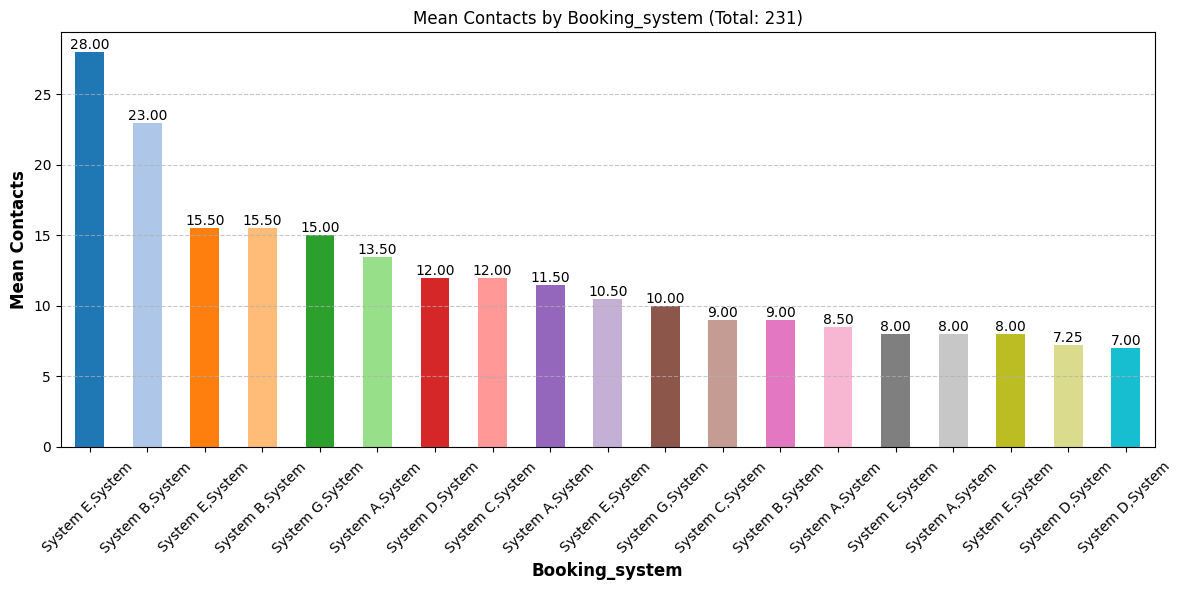

### Origin_country Stratification


### Stratified Statistics

| Group     | Count | Mean | StD | Min | 25% | 50% | 75% | Max | GlobOutlier | InGrpOutlier | Percentage Vector |
|-----------|-------|------|-----|-----|-----|-----|-----|-----|-------------|--------------|-------------------|
| Argentina | 10059 | 0.71 | 2.47 | 0 | 0.0 | 0.0 | 0.0 | 46 |  |  | [0.80 0.07 0.04 0.02 0.01 0.05] |
| Australia | 246884 | 0.53 | 1.86 | 0 | 0.0 | 0.0 | 0.0 | 103 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| Austria | 85655 | 0.38 | 1.45 | 0 | 0.0 | 0.0 | 0.0 | 46 |  |  | [0.86 0.06 0.03 0.02 0.01 0.02] |
| Bahrain | 13104 | 0.39 | 1.46 | 0 | 0.0 | 0.0 | 0.0 | 41 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Belgium | 49590 | 0.41 | 1.60 | 0 | 0.0 | 0.0 | 0.0 | 62 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Bolivia | 361 | 0.40 | 1.55 | 0 | 0.0 | 0.0 | 0.0 | 15 |  |  | [0.84 0.10 0.02 0.02 0.01 0.02] |
| Brazil | 242003 | 0.67 | 2.26 | 0 | 0.0 | 0.0 | 0.0 | 185 |  |  | [0.79 0.08 0.04 0.03 0.02 0.04] |
| Bulgaria | 7146 | 0.39 | 1.44 | 0 | 0.0 | 0.0 | 0.0 | 30 |  |  | [0.86 0.07 0.03 0.02 0.01 0.02] |
| Canada | 176882 | 0.61 | 2.07 | 0 | 0.0 | 0.0 | 0.0 | 75 |  |  | [0.80 0.09 0.04 0.02 0.01 0.03] |
| Chile | 24223 | 0.50 | 1.89 | 0 | 0.0 | 0.0 | 0.0 | 69 |  |  | [0.83 0.08 0.04 0.02 0.01 0.03] |
| China | 4938 | 0.73 | 2.13 | 0 | 0.0 | 0.0 | 0.0 | 45 |  |  | [0.76 0.09 0.05 0.03 0.02 0.04] |
| Colombia | 18296 | 0.50 | 2.07 | 0 | 0.0 | 0.0 | 0.0 | 108 |  |  | [0.83 0.08 0.03 0.02 0.01 0.03] |
| Croatia | 9222 | 0.33 | 1.33 | 0 | 0.0 | 0.0 | 0.0 | 42 |  |  | [0.88 0.06 0.03 0.01 0.01 0.02] |
| Cuba | 14443 | 0.60 | 2.32 | 0 | 0.0 | 0.0 | 0.0 | 92 |  |  | [0.81 0.08 0.04 0.02 0.01 0.04] |
| Cyprus | 11437 | 0.44 | 1.66 | 0 | 0.0 | 0.0 | 0.0 | 44 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Czech Republic | 37617 | 0.35 | 1.36 | 0 | 0.0 | 0.0 | 0.0 | 45 |  |  | [0.87 0.06 0.03 0.02 0.01 0.02] |
| Denmark | 108601 | 0.36 | 1.35 | 0 | 0.0 | 0.0 | 0.0 | 61 |  |  | [0.86 0.07 0.03 0.02 0.01 0.02] |
| Ecuador | 1197 | 0.49 | 2.82 | 0 | 0.0 | 0.0 | 0.0 | 74 |  |  | [0.86 0.06 0.02 0.02 0.01 0.03] |
| Egypt | 7809 | 0.35 | 1.27 | 0 | 0.0 | 0.0 | 0.0 | 31 |  |  | [0.86 0.07 0.03 0.02 0.01 0.02] |
| Estonia | 9288 | 0.29 | 1.31 | 0 | 0.0 | 0.0 | 0.0 | 32 |  |  | [0.89 0.06 0.02 0.01 0.01 0.01] |
| Finland | 38701 | 0.43 | 1.69 | 0 | 0.0 | 0.0 | 0.0 | 70 |  |  | [0.85 0.06 0.03 0.02 0.01 0.02] |
| France | 525612 | 0.41 | 1.66 | 0 | 0.0 | 0.0 | 0.0 | 144 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Germany | 738300 | 0.38 | 1.49 | 0 | 0.0 | 0.0 | 0.0 | 176 |  |  | [0.86 0.06 0.03 0.02 0.01 0.02] |
| Greece | 73208 | 0.29 | 1.10 | 0 | 0.0 | 0.0 | 0.0 | 38 |  |  | [0.87 0.07 0.03 0.01 0.01 0.01] |
| Guernsey | 25729 | 0.46 | 1.93 | 0 | 0.0 | 0.0 | 0.0 | 79 |  |  | [0.85 0.06 0.03 0.02 0.01 0.03] |
| Hong Kong | 18773 | 0.44 | 1.65 | 0 | 0.0 | 0.0 | 0.0 | 58 |  |  | [0.84 0.07 0.04 0.02 0.01 0.02] |
| Hungary | 10846 | 0.47 | 1.52 | 0 | 0.0 | 0.0 | 0.0 | 26 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| Iceland | 4967 | 0.34 | 1.35 | 0 | 0.0 | 0.0 | 0.0 | 36 |  |  | [0.86 0.07 0.03 0.01 0.01 0.02] |
| India | 74400 | 0.54 | 2.23 | 0 | 0.0 | 0.0 | 0.0 | 149 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| Indonesia | 20328 | 0.46 | 1.63 | 0 | 0.0 | 0.0 | 0.0 | 53 |  |  | [0.84 0.07 0.03 0.02 0.01 0.03] |
| Ireland | 40532 | 0.48 | 1.85 | 0 | 0.0 | 0.0 | 0.0 | 60 |  |  | [0.84 0.07 0.03 0.02 0.01 0.03] |
| Israel | 37870 | 0.93 | 2.79 | 0 | 0.0 | 0.0 | 0.0 | 117 |  | * | [0.76 0.08 0.05 0.03 0.02 0.06] |
| Italy | 311717 | 0.39 | 1.52 | 0 | 0.0 | 0.0 | 0.0 | 108 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Japan | 122509 | 0.45 | 1.59 | 0 | 0.0 | 0.0 | 0.0 | 70 |  |  | [0.84 0.07 0.04 0.02 0.01 0.02] |
| Jordan | 3742 | 0.58 | 2.20 | 0 | 0.0 | 0.0 | 0.0 | 58 |  |  | [0.83 0.07 0.04 0.02 0.01 0.04] |
| Kazakhstan | 9793 | 0.31 | 1.46 | 0 | 0.0 | 0.0 | 0.0 | 45 |  |  | [0.90 0.04 0.02 0.01 0.01 0.02] |
| Korea | 100016 | 0.73 | 2.14 | 0 | 0.0 | 0.0 | 0.0 | 93 |  |  | [0.75 0.10 0.05 0.03 0.02 0.04] |
| Kuwait | 29240 | 0.44 | 1.72 | 0 | 0.0 | 0.0 | 0.0 | 84 |  |  | [0.84 0.07 0.03 0.02 0.01 0.02] |
| Luxemburg | 7369 | 0.30 | 1.25 | 0 | 0.0 | 0.0 | 0.0 | 27 |  |  | [0.89 0.05 0.03 0.01 0.01 0.02] |
| Macau | 654 | 0.51 | 1.91 | 0 | 0.0 | 0.0 | 0.0 | 25 |  |  | [0.85 0.06 0.04 0.01 0.02 0.03] |
| Malaysia | 31720 | 0.41 | 1.56 | 0 | 0.0 | 0.0 | 0.0 | 46 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Malta | 6708 | 0.47 | 1.73 | 0 | 0.0 | 0.0 | 0.0 | 59 |  |  | [0.83 0.08 0.04 0.02 0.01 0.03] |
| Mexico | 80282 | 0.49 | 1.89 | 0 | 0.0 | 0.0 | 0.0 | 98 |  |  | [0.83 0.08 0.04 0.02 0.01 0.03] |
| Netherlands | 134736 | 0.45 | 1.67 | 0 | 0.0 | 0.0 | 0.0 | 154 |  |  | [0.83 0.07 0.04 0.02 0.01 0.02] |
| New Zealand | 27015 | 0.63 | 2.22 | 0 | 0.0 | 0.0 | 0.0 | 60 |  |  | [0.81 0.07 0.04 0.02 0.01 0.04] |
| Nigeria | 1301 | 1.07 | 2.65 | 0 | 0.0 | 0.0 | 1.0 | 28 |  |  | [0.71 0.10 0.05 0.04 0.03 0.08] |
| Norway | 93222 | 0.46 | 1.72 | 0 | 0.0 | 0.0 | 0.0 | 78 |  |  | [0.85 0.07 0.03 0.02 0.01 0.03] |
| Oman | 7501 | 0.50 | 1.97 | 0 | 0.0 | 0.0 | 0.0 | 38 |  |  | [0.84 0.07 0.03 0.02 0.01 0.03] |
| Paraguay | 157 | 0.50 | 2.40 | 0 | 0.0 | 0.0 | 0.0 | 24 |  |  | [0.87 0.06 0.02 0.03 0.01 0.02] |
| Peru | 8837 | 0.61 | 2.10 | 0 | 0.0 | 0.0 | 0.0 | 62 |  |  | [0.81 0.08 0.04 0.02 0.01 0.04] |
| Philippines | 19932 | 0.50 | 1.98 | 0 | 0.0 | 0.0 | 0.0 | 95 |  |  | [0.84 0.07 0.04 0.02 0.01 0.03] |
| Poland | 90002 | 0.40 | 1.50 | 0 | 0.0 | 0.0 | 0.0 | 53 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Portugal | 101674 | 0.38 | 1.53 | 0 | 0.0 | 0.0 | 0.0 | 80 |  |  | [0.85 0.07 0.03 0.02 0.01 0.02] |
| Qatar | 20292 | 0.52 | 1.82 | 0 | 0.0 | 0.0 | 0.0 | 55 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| Romania | 34323 | 0.41 | 1.51 | 0 | 0.0 | 0.0 | 0.0 | 56 |  |  | [0.83 0.08 0.03 0.02 0.01 0.02] |
| Saudi Arabia | 112601 | 0.45 | 1.84 | 0 | 0.0 | 0.0 | 0.0 | 141 |  |  | [0.84 0.07 0.03 0.02 0.01 0.02] |
| Serbia | 3817 | 0.42 | 1.65 | 0 | 0.0 | 0.0 | 0.0 | 39 |  |  | [0.86 0.06 0.03 0.02 0.01 0.02] |
| Singapore | 27894 | 0.46 | 1.62 | 0 | 0.0 | 0.0 | 0.0 | 65 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| Slovakia | 2337 | 0.24 | 1.17 | 0 | 0.0 | 0.0 | 0.0 | 29 |  |  | [0.90 0.05 0.03 0.01 0.01 0.01] |
| South Africa | 56806 | 0.35 | 1.85 | 0 | 0.0 | 0.0 | 0.0 | 171 |  |  | [0.89 0.05 0.02 0.01 0.01 0.02] |
| Spain | 297062 | 0.41 | 1.58 | 0 | 0.0 | 0.0 | 0.0 | 93 |  |  | [0.84 0.08 0.03 0.02 0.01 0.02] |
| Sweden | 182136 | 0.48 | 1.78 | 0 | 0.0 | 0.0 | 0.0 | 173 |  |  | [0.83 0.07 0.04 0.02 0.01 0.03] |
| Switzerland | 191888 | 0.31 | 1.43 | 0 | 0.0 | 0.0 | 0.0 | 196 |  |  | [0.89 0.05 0.02 0.01 0.01 0.02] |
| Taiwan | 14225 | 0.33 | 1.45 | 0 | 0.0 | 0.0 | 0.0 | 54 |  |  | [0.89 0.04 0.03 0.02 0.01 0.02] |
| Thailand | 78982 | 0.30 | 1.22 | 0 | 0.0 | 0.0 | 0.0 | 42 |  |  | [0.88 0.05 0.03 0.01 0.01 0.02] |
| Turkey | 30353 | 0.56 | 2.22 | 0 | 0.0 | 0.0 | 0.0 | 167 |  |  | [0.81 0.08 0.04 0.02 0.01 0.03] |
| USA | 566268 | 0.49 | 1.66 | 0 | 0.0 | 0.0 | 0.0 | 166 |  |  | [0.81 0.09 0.04 0.02 0.01 0.02] |
| Ukraine | 16374 | 0.42 | 1.53 | 0 | 0.0 | 0.0 | 0.0 | 52 |  |  | [0.84 0.08 0.04 0.02 0.01 0.02] |
| United Arab Emirates | 86199 | 0.50 | 1.87 | 0 | 0.0 | 0.0 | 0.0 | 107 |  |  | [0.82 0.08 0.04 0.02 0.01 0.03] |
| United Kingdom | 693560 | 0.51 | 1.86 | 0 | 0.0 | 0.0 | 0.0 | 243 |  |  | [0.83 0.08 0.04 0.02 0.01 0.03] |
| Uruguay | 1180 | 0.65 | 2.35 | 0 | 0.0 | 0.0 | 0.0 | 38 |  |  | [0.82 0.07 0.04 0.02 0.02 0.04] |
| Uzbekistan | 2373 | 0.18 | 1.05 | 0 | 0.0 | 0.0 | 0.0 | 14 |  |  | [0.94 0.02 0.01 0.01 0.00 0.01] |
| Venezuela | 247 | 0.38 | 1.20 | 0 | 0.0 | 0.0 | 0.0 | 9 |  |  | [0.85 0.06 0.03 0.02 0.01 0.02] |
| Vietnam | 5141 | 0.47 | 1.58 | 0 | 0.0 | 0.0 | 0.0 | 29 |  |  | [0.82 0.08 0.04 0.02 0.01 0.02] |


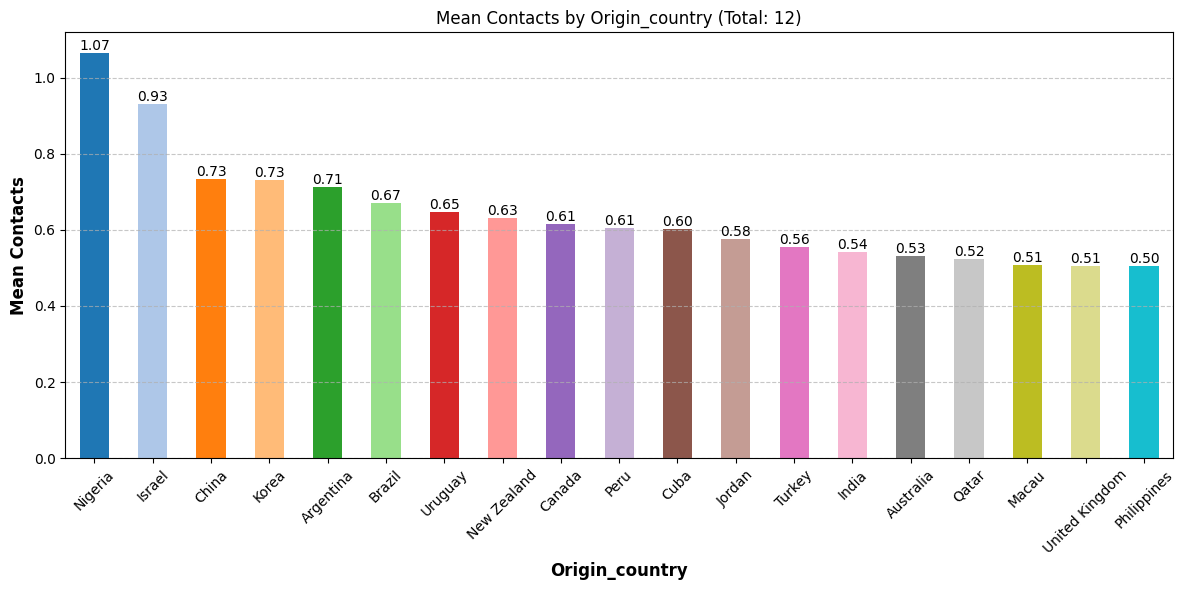

### Journey_type_id Stratification


### Stratified Statistics

| Group     | Count | Mean | StD | Min | 25% | 50% | 75% | Max | GlobOutlier | InGrpOutlier | Percentage Vector |
|-----------|-------|------|-----|-----|-----|-----|-----|-----|-------------|--------------|-------------------|
| MultiStop | 29376 | 1.10 | 3.09 | 0 | 0.0 | 0.0 | 1.0 | 97 |  | * | [0.71 0.10 0.06 0.04 0.02 0.07] |
| One-way | 3829653 | 0.38 | 1.52 | 0 | 0.0 | 0.0 | 0.0 | 243 |  |  | [0.86 0.07 0.03 0.02 0.01 0.02] |
| OpenJawDouble | 2698 | 0.90 | 2.64 | 0 | 0.0 | 0.0 | 1.0 | 43 |  |  | [0.74 0.10 0.05 0.03 0.02 0.06] |
| OpenJawSingleDestination | 24990 | 0.61 | 2.13 | 0 | 0.0 | 0.0 | 0.0 | 108 |  |  | [0.80 0.08 0.04 0.02 0.01 0.04] |
| OpenJawSingleOrigin | 66131 | 0.81 | 2.67 | 0 | 0.0 | 0.0 | 0.0 | 154 |  |  | [0.77 0.09 0.05 0.03 0.02 0.05] |
| Round-trip | 2347358 | 0.57 | 1.96 | 0 | 0.0 | 0.0 | 0.0 | 184 |  |  | [0.81 0.08 0.04 0.02 0.01 0.03] |


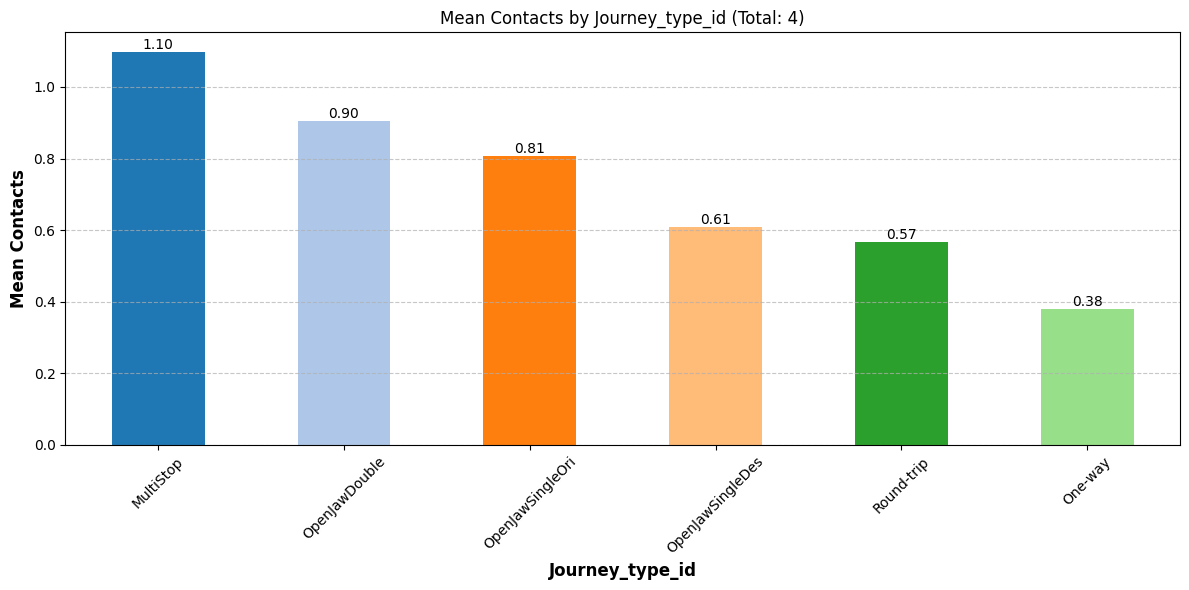

In [3]:
# Overall results
overall_res = analysis.compute_contacts_stats(orders_df)
common.display_errands_stats(overall_res)

# Stratified by 'site_country'
features = [
    "partner",
    "customer_group_type",
    "device",
    "booking_system",
    "origin_country",
    "journey_type_id",
]
for feature in features:
    stratified_results = analysis.compute_contacts_stats(orders_df, stratify_by=feature)
    common.render_markdown(f"### {feature.capitalize()} Stratification\n")
    common.display_errands_stats(stratified_results, overall_series=orders_df["count_errands"])

    # Build a pandas Series from the mean values of the stratified results, sorting by descending order
    mean_values = {key: value["mean"] for key, value in stratified_results.items()}
    mean_values = common.pd.Series(mean_values).sort_values(ascending=False)


    plotting.plot_count_series(mean_values, title=f"Mean Contacts by {feature.capitalize()}", 
                               xlabel=feature.capitalize(),
                               ylabel="Mean Contacts",
                               show_decimals=True,
                               show_other=False)

# Filtered for 'Brand A' and stratified by 'device'
# res_by_device = compute_contacts_stats(
#     orders_df,
#     stratify_by="device",
#     filter_column="brand",
#     filter_values=["Brand A"],
# )
# display_contacts_stats(res_by_device)